# King County Real Estate - Housing Analysis

## Business Question:

King County Real Estate has hired us to investigate which features of a home have the greatest effect on price.

* They would like us to make a model to predict housing prices.
* From that model, they would like to know which factors have the largest effect on price.

## Data Importing & Cleaning

The dataset "kc_house_data.csv" was obtained from the link below. King County 2014-2015 House Sales dataset

https://osf.io/twq9p/

https://github.com/bigbenx3/housing_analysis_project/blob/main/column_names%20descriptions.md

The descriptions for each feature/column in the dataset

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import scipy.stats as stats


sns.set_style("whitegrid")
%matplotlib inline

sns.set(rc={'figure.figsize':(11,8)})

In [2]:
url = "https://raw.githubusercontent.com/bigbenx3/housing_analysis_project/main/kc_house_data.csv"
df1 = pd.read_csv(url, error_bad_lines=False)

In [3]:
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Sneak preview of all the features in dataset.

##### Null values present?

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

21613 non null entries for each columns. Also, all the data, with the exception of date, are numeric (floats and integers). So, that's good.

We can guess "date" may be dropped, but to err on the side of caution, changing date to a numerical data type should allow us see the correlation to "price".

In [5]:
type(df1["date"][0])

str

In [6]:
df1["date"][0]

'20141013T000000'

So the values in the "date" column are strings

In [7]:
df1["date"] = df1["date"].str.replace("T000000", "")
df1["date"]

0        20141013
1        20141209
2        20150225
3        20141209
4        20150218
           ...   
21608    20140521
21609    20150223
21610    20140623
21611    20150116
21612    20141015
Name: date, Length: 21613, dtype: object

With the extra tail of the string removed, the date can now become an integer.

In [8]:
df1["date"] = df1["date"].astype(int)

In [9]:
type(df1["date"][0])

numpy.int32

Somewhat questionable.

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  int32  
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [11]:
df1.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Still no null values and "date" column are now integers, as displayed by the .info() and .isnull().sum() functions.

## Data - Cleaning & Manipulation

#### Outlier Detection

Let's again look back at the sort of data that we have, using the .describe() function.
Are there outliers we should remove first?

In [12]:
df1.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,2.014390e+07,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,4.436582e+03,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,2.014050e+07,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,2.014072e+07,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,2.014102e+07,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,2.015022e+07,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,2.015053e+07,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000



* "id" but we will ignore this feature because the id is unique identifier for each house


* "date" when house was sold, sort of irrelevant at face value to house price


* "view" is how many times the house was viewed. This isn't really relevant but will be confirmed with the .corr(). And they 
  are just counts of the times viewed, not really applicable to eliminate outliers for.


* "waterfront" is based on presence or absence of a waterfront. The "1" and "0" are indicative of presence of waterfront. No 
  outliers there.


So we see a couple of max values that are way outside of the 75 percentile: 

* "bedrooms" :      33 bedrooms max when the 75% is 4 bedrooms


* "bathrooms":       8 bathrooms max when 75% is 2.5 bathrooms


* "sqft_living":    13540 sqft max when 75% is 2550 sqft


* "sqft_lot":       1.65 million sqft when 75% is 10688 sqft


* "sqft_above":     9410 sqft max when 75% is 2210 sqft


* "sqft_basement":  4820 sqft max when 75% is 560 sqft 


* "sqft_living15":  6210 sqft max when 75% is 2360 sqft


* "sqft_lot15":     871200 sqft max, 75% is 10083 sqft


You may have noticed that such features as "price", "grade", "condition", "yr_built", "yr_renovated", "zipcode", "lat", "long" 
were not included as features needing to remove outliers. 
These will be reviewed later down the line.

So to prevent skewing of our model, let's try and remove the outliers from all the columns.

#### Bedrooms

First, let's set up an initial test run that will iterate through all the columns in our data frame.
We'll use "bedrooms" to test.

In [13]:
df1.bedrooms.describe()

count    21613.000000
mean         3.370842
std          0.930062
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

<AxesSubplot:xlabel='bedrooms', ylabel='Count'>

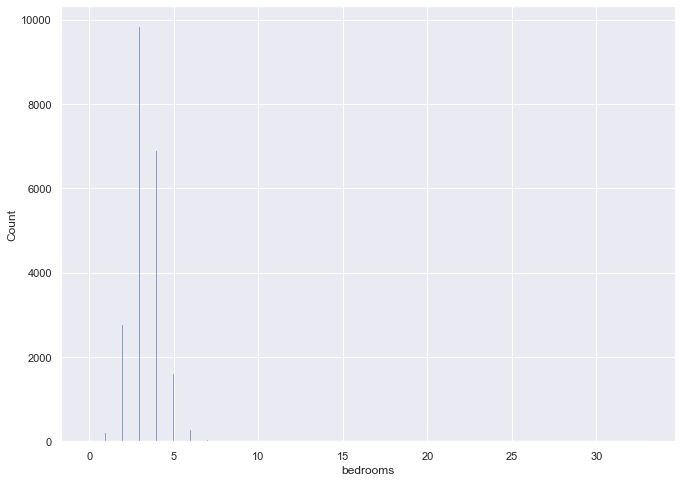

In [14]:
sns.histplot(df1["bedrooms"])

We see the histogram display extend to include the 33 bedrooms, however, most of the data is within 7 bedrooms.

Let's set up the upper and lower limits.

In [15]:
upper_limit = df1.bedrooms.mean() + 3*df1.bedrooms.std()
upper_limit

6.1610271165395645

In [16]:
lower_limit = df1.bedrooms.mean() - 3*df1.bedrooms.std()
lower_limit

0.5806561296548547

So, these are the two boundaries that will help discern what is and what isn't an outlier.

In [17]:
df1[(df1.bedrooms>upper_limit)|(df1.bedrooms<lower_limit)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
556,5486800070,20140620,1950000.0,7,3.50,4640,15235,2.0,0,1,...,11,2860,1780,1965,2003,98040,47.5666,-122.231,3230,20697
875,6306400140,20140612,1095000.0,0,0.00,3064,4764,3.5,0,2,...,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
1135,4024100951,20150105,420000.0,7,3.00,2940,8624,1.0,0,0,...,8,1690,1250,1977,0,98155,47.7555,-122.307,1850,8031
1241,7227802030,20140623,350000.0,7,3.00,2800,9569,1.0,0,2,...,7,1400,1400,1963,0,98056,47.5102,-122.183,2150,7333
1660,9126101740,20141204,490000.0,8,5.00,2800,2580,2.0,0,0,...,8,1880,920,1997,0,98122,47.6086,-122.303,1800,2580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18975,1778360150,20140620,1240000.0,7,5.50,6630,13782,2.0,0,0,...,10,4930,1700,2004,0,98006,47.5399,-122.118,4470,8639
19254,8812401450,20141229,660000.0,10,3.00,2920,3745,2.0,0,0,...,7,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745
19302,3756900027,20141125,575000.0,8,3.00,3840,15990,1.0,0,0,...,7,2530,1310,1961,0,98034,47.7111,-122.211,1380,8172
19327,2771604190,20140617,824000.0,7,4.25,3670,4000,2.0,0,1,...,8,2800,870,1964,0,98199,47.6375,-122.388,2010,4000


So, these would be our outliers, 75 of them for the "bedrooms" column. Those entries below the "lower_limit" and above the "upper_limit".

In [18]:
df_out_rmv1 = df1[(df1.bedrooms<upper_limit) & (df1.bedrooms>lower_limit)]
df_out_rmv1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [19]:
df_out_rmv1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21538 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21538 non-null  int64  
 1   date           21538 non-null  int32  
 2   price          21538 non-null  float64
 3   bedrooms       21538 non-null  int64  
 4   bathrooms      21538 non-null  float64
 5   sqft_living    21538 non-null  int64  
 6   sqft_lot       21538 non-null  int64  
 7   floors         21538 non-null  float64
 8   waterfront     21538 non-null  int64  
 9   view           21538 non-null  int64  
 10  condition      21538 non-null  int64  
 11  grade          21538 non-null  int64  
 12  sqft_above     21538 non-null  int64  
 13  sqft_basement  21538 non-null  int64  
 14  yr_built       21538 non-null  int64  
 15  yr_renovated   21538 non-null  int64  
 16  zipcode        21538 non-null  int64  
 17  lat            21538 non-null  float64
 18  long  

<AxesSubplot:xlabel='bedrooms', ylabel='Count'>

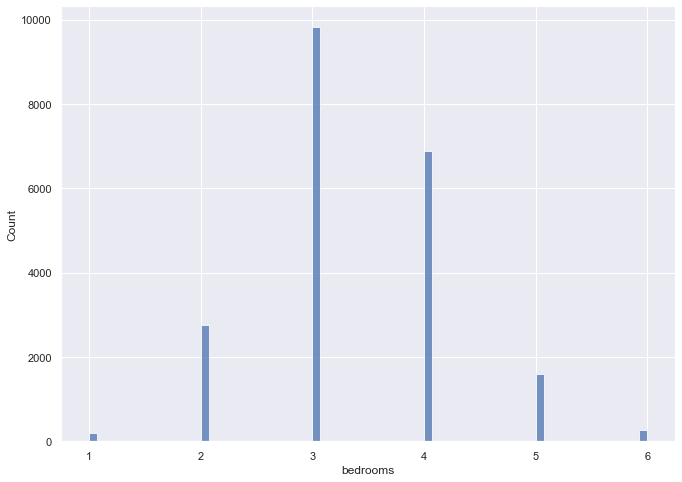

In [20]:
sns.histplot(df_out_rmv1["bedrooms"])

So we started out with 21,613 non-null entries and now end up with 21538 remaining entries (still non-null entries) as displayed by .info(). That is congruent to 75 outliers we saw before removed from the original dataframe.

#### Bathrooms

In [21]:
df_out_rmv1.bathrooms.describe()

count    21538.000000
mean         2.111106
std          0.762645
min          0.000000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

<AxesSubplot:xlabel='bathrooms', ylabel='Count'>

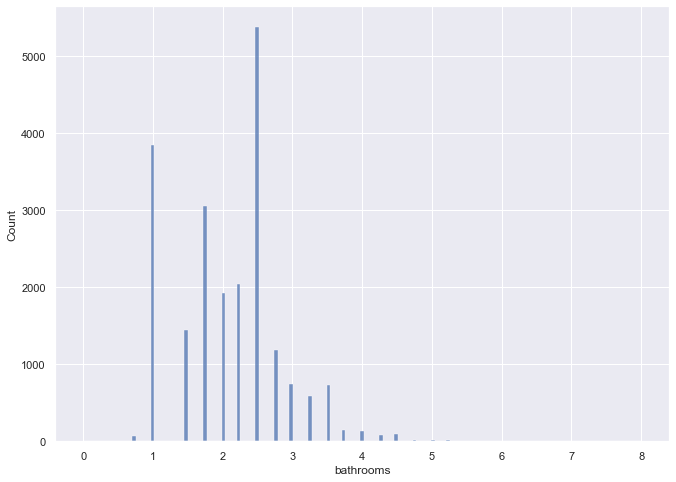

In [22]:
sns.histplot(df_out_rmv1["bathrooms"])

Let's set up the upper and lower limits.

In [23]:
upper_limit = df_out_rmv1.bathrooms.mean() + 3*df_out_rmv1.bathrooms.std()
upper_limit

4.399039968533435

In [24]:
lower_limit = df_out_rmv1.bathrooms.mean() - 3*df_out_rmv1.bathrooms.std()
lower_limit

-0.17682806399262274

So, these are the two boundaries that will help discern what is and what isn't an outlier.

In [25]:
df_out_rmv1[(df_out_rmv1.bathrooms>upper_limit)|(df_out_rmv1.bathrooms<lower_limit)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5,7237550310,20140512,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
270,4054500390,20141007,1365000.0,4,4.75,5310,57346,2.0,0,0,...,11,5310,0,1989,0,98077,47.7285,-122.042,4180,47443
300,3225069065,20140624,3075000.0,4,5.00,4550,18641,1.0,1,4,...,10,2600,1950,2002,0,98074,47.6053,-122.077,4550,19508
450,4055700030,20150502,1450000.0,3,4.50,3970,24920,2.0,0,2,...,10,3260,710,1977,1999,98034,47.7183,-122.258,2610,13838
527,3225079035,20140618,1600000.0,6,5.00,6050,230652,2.0,0,3,...,11,6050,0,2001,0,98024,47.6033,-121.943,4210,233971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21344,8835770170,20140822,1488000.0,5,6.00,6880,279968,2.0,0,3,...,12,4070,2810,2007,0,98045,47.4624,-121.779,4690,256803
21494,2413910120,20140702,915000.0,3,4.50,3850,62726,2.0,0,0,...,10,3120,730,2013,0,98053,47.6735,-122.058,2630,46609
21506,2524069097,20140509,2238890.0,5,6.50,7270,130017,2.0,0,0,...,12,6420,850,2010,0,98027,47.5371,-121.982,1800,44890
21551,1561750040,20141224,1375000.0,5,4.50,4350,13405,2.0,0,0,...,11,4350,0,2014,0,98074,47.6018,-122.060,3990,7208


Those entries below the "lower_limit" and above the "upper_limit".

In [26]:
df_out_rmv2 = df_out_rmv1[(df_out_rmv1.bathrooms<upper_limit) & (df_out_rmv1.bathrooms>lower_limit)]
df_out_rmv2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


<AxesSubplot:xlabel='bathrooms', ylabel='Count'>

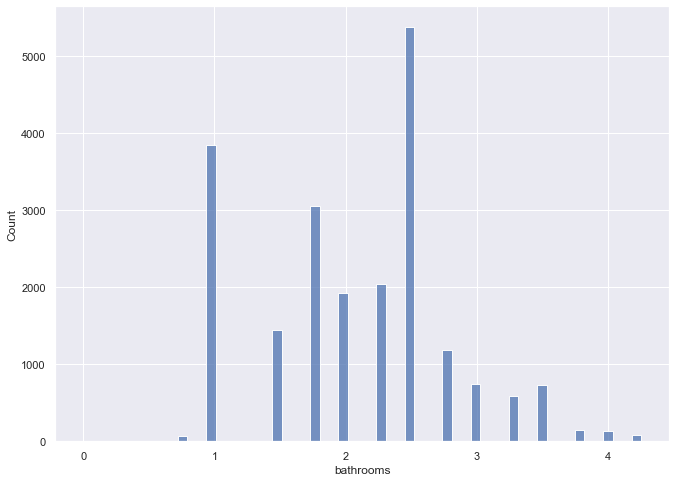

In [27]:
sns.histplot(df_out_rmv2["bathrooms"])

We see the new histogram display after removal of outliers.

#### Sqft_living

In [28]:
df_out_rmv2.sqft_living.describe()

count    21366.000000
mean      2051.124122
std        861.919681
min        370.000000
25%       1420.000000
50%       1900.000000
75%       2520.000000
max       7850.000000
Name: sqft_living, dtype: float64

<AxesSubplot:xlabel='sqft_living', ylabel='Count'>

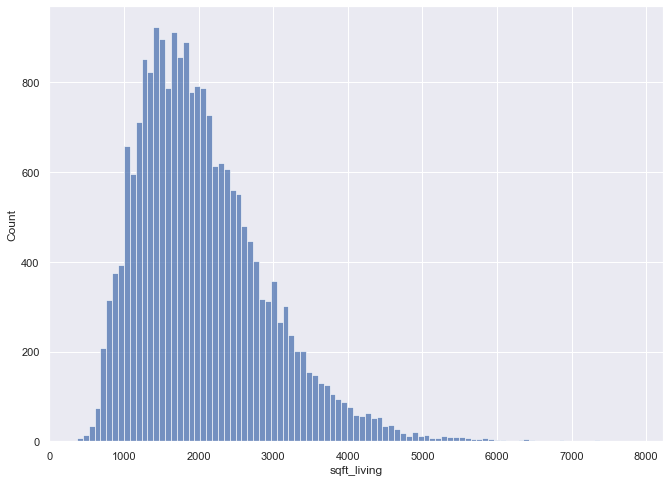

In [29]:
sns.histplot(df_out_rmv2["sqft_living"])

Let's set up the upper and lower limits.

In [30]:
upper_limit = df_out_rmv2.sqft_living.mean() + 3*df_out_rmv2.sqft_living.std()
upper_limit

4636.883166057281

In [31]:
lower_limit = df_out_rmv2.sqft_living.mean() - 3*df_out_rmv2.sqft_living.std()
lower_limit

-534.6349211822458

So, these are the two boundaries that will help discern what is and what isn't an outlier.

In [32]:
df_out_rmv2[(df_out_rmv2.sqft_living>upper_limit)|(df_out_rmv2.sqft_living<lower_limit)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
70,1525059190,20140912,1040000.0,5,3.25,4770,50094,1.0,0,0,...,11,3070,1700,1973,0,98005,47.6525,-122.160,3530,38917
153,7855801670,20150401,2250000.0,4,3.25,5180,19850,2.0,0,3,...,12,3540,1640,2006,0,98006,47.5620,-122.162,3160,9750
269,7960900060,20150504,2900000.0,4,3.25,5050,20100,1.5,0,2,...,11,4750,300,1982,2008,98004,47.6312,-122.223,3890,20060
384,713500030,20140728,1350000.0,5,3.50,4800,14984,2.0,0,2,...,11,3480,1320,1998,0,98006,47.5543,-122.148,4050,19009
419,8678500060,20140710,1550000.0,5,4.25,6070,171626,2.0,0,0,...,12,6070,0,1999,0,98024,47.5954,-121.950,4680,211267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21467,2311400056,20141201,1987500.0,5,3.50,5230,8960,2.0,0,0,...,11,4450,780,2014,0,98004,47.5964,-122.201,2310,9603
21520,7237550100,20140825,1408760.0,4,4.00,4920,50621,2.0,0,0,...,10,4280,640,2012,0,98053,47.6575,-122.006,4920,74052
21521,7430500110,20141209,1378000.0,5,3.50,5150,12230,2.0,0,2,...,10,3700,1450,2007,0,98008,47.6249,-122.090,2940,13462
21530,8964800330,20150407,3000000.0,4,3.75,5090,14823,1.0,0,0,...,11,4180,910,2013,0,98004,47.6200,-122.207,3030,12752


Those entries below the "lower_limit" and above the "upper_limit".

In [33]:
df_out_rmv3 = df_out_rmv2[(df_out_rmv2.sqft_living<upper_limit) & (df_out_rmv2.sqft_living>lower_limit)]
df_out_rmv3

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


<AxesSubplot:xlabel='sqft_living', ylabel='Count'>

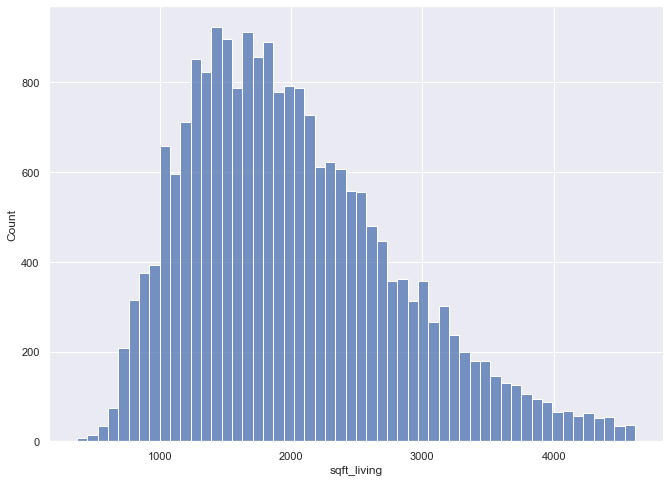

In [34]:
sns.histplot(df_out_rmv3["sqft_living"])

We see the new histogram display after removal of outliers.

#### Sqft_lot

In [35]:
df_out_rmv3.sqft_lot.describe()

count    2.115300e+04
mean     1.457419e+04
std      3.988992e+04
min      5.200000e+02
25%      5.005000e+03
50%      7.560000e+03
75%      1.046600e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

<AxesSubplot:xlabel='sqft_lot', ylabel='Count'>

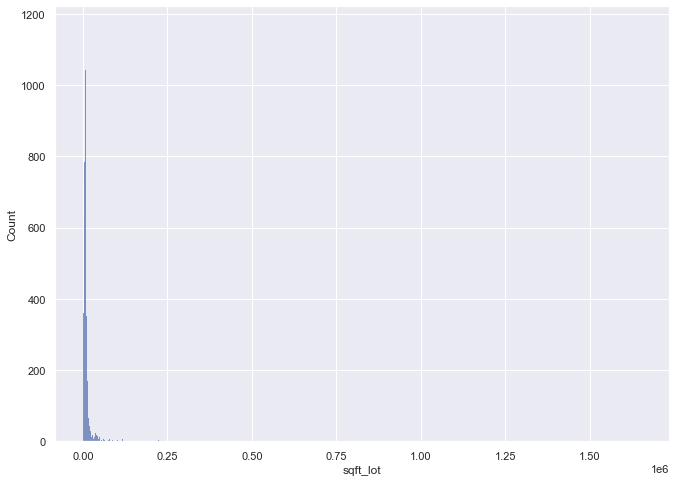

In [36]:
sns.histplot(df_out_rmv3["sqft_lot"])

Let's set up the upper and lower limits.

In [37]:
upper_limit = df_out_rmv3.sqft_lot.mean() + 3*df_out_rmv3.sqft_lot.std()
upper_limit

134243.956767408

In [38]:
lower_limit = df_out_rmv3.sqft_lot.mean() - 3*df_out_rmv3.sqft_lot.std()
lower_limit

-105095.57251931081

So, these are the two boundaries that will help discern what is and what isn't an outlier.

In [39]:
df_out_rmv3[(df_out_rmv3.sqft_lot>upper_limit)|(df_out_rmv3.sqft_lot<lower_limit)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
145,1526069017,20141203,921500.0,4,2.50,3670,315374,2.0,0,0,...,9,3670,0,1994,0,98077,47.7421,-122.026,2840,87991
199,1222069094,20141014,385000.0,3,1.75,1350,155073,1.0,0,0,...,7,1350,0,1969,0,98038,47.4058,-121.994,1560,50965
238,326069104,20140701,800000.0,3,3.50,3830,221284,2.0,0,0,...,10,3530,300,1993,0,98077,47.7641,-122.023,2920,148539
380,1726059053,20140916,270000.0,2,1.50,1380,209959,1.0,0,0,...,6,1380,0,1954,0,98011,47.7461,-122.195,3130,19868
411,2422029094,20140716,517534.0,2,1.00,833,143947,1.0,0,0,...,5,833,0,2006,0,98070,47.3889,-122.482,1380,143947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21090,1624079024,20140515,720000.0,3,2.50,3150,151588,2.0,0,0,...,9,3150,0,2007,0,98024,47.5720,-121.926,2410,208652
21325,2826079027,20141112,659000.0,3,2.50,3090,384634,2.0,0,0,...,8,3090,0,2007,0,98019,47.7072,-121.927,2200,292645
21351,3421069049,20141021,565000.0,2,1.75,1130,276170,1.0,0,0,...,8,1130,0,2006,0,98022,47.2673,-122.027,2092,217800
21431,2725079018,20140509,800000.0,4,3.25,3540,159430,2.0,0,0,...,9,3540,0,2007,0,98014,47.6285,-121.899,1940,392040


Those entries below the "lower_limit" and above the "upper_limit".

In [40]:
df_out_rmv4 = df_out_rmv3[(df_out_rmv3.sqft_lot<upper_limit) & (df_out_rmv3.sqft_lot>lower_limit)]
df_out_rmv4

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


<AxesSubplot:xlabel='sqft_lot', ylabel='Count'>

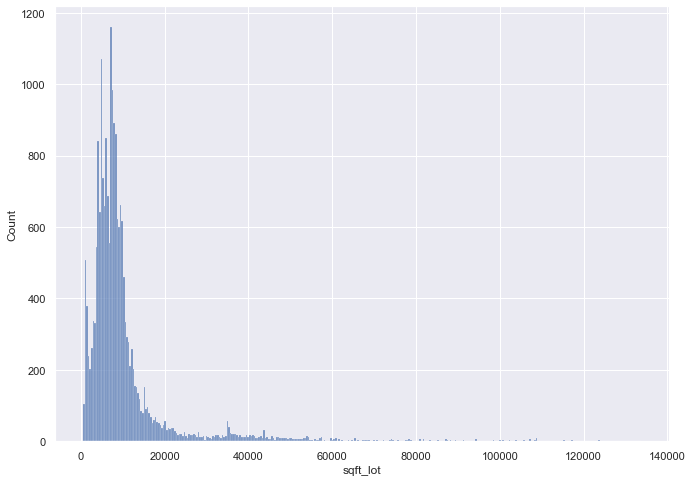

In [41]:
sns.histplot(df_out_rmv4["sqft_lot"])

We see the new histogram display after removal of outliers.

#### Sqft_above

In [42]:
df_out_rmv4.sqft_above.describe()

count    20830.000000
mean      1730.859386
std        739.716862
min        370.000000
25%       1180.000000
50%       1540.000000
75%       2150.000000
max       4620.000000
Name: sqft_above, dtype: float64

<AxesSubplot:xlabel='sqft_above', ylabel='Count'>

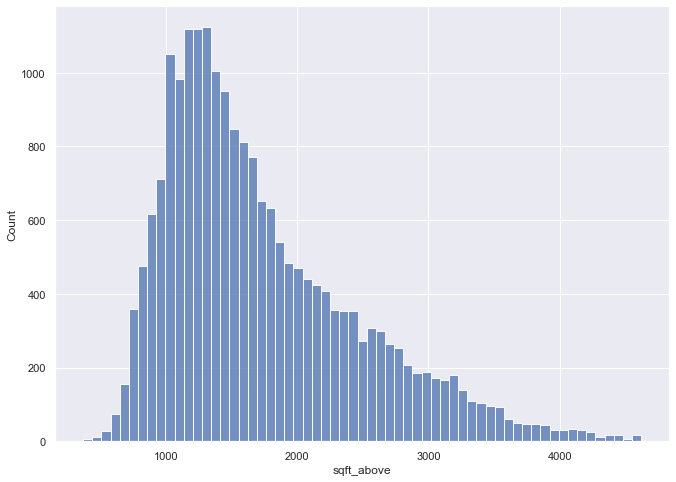

In [43]:
sns.histplot(df_out_rmv4["sqft_above"])

Let's set up the upper and lower limits.

In [44]:
upper_limit = df_out_rmv4.sqft_above.mean() + 3*df_out_rmv4.sqft_above.std()
upper_limit

3950.0099718729916

In [45]:
lower_limit = df_out_rmv4.sqft_above.mean() - 3*df_out_rmv4.sqft_above.std()
lower_limit

-488.2912008696312

So, these are the two boundaries that will help discern what is and what isn't an outlier.

In [46]:
df_out_rmv4[(df_out_rmv4.sqft_above>upper_limit)|(df_out_rmv4.sqft_above<lower_limit)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
431,2944010240,20140908,988000.0,4,3.00,4040,19700,2.0,0,0,...,11,4040,0,1987,0,98052,47.7205,-122.127,3930,21887
509,3885805665,20140612,1485000.0,4,3.75,4030,10800,2.0,0,0,...,10,4030,0,2006,0,98033,47.6821,-122.196,2160,7200
512,7322910030,20140721,1095000.0,5,3.50,4410,57063,2.0,0,0,...,9,4410,0,1990,0,98053,47.6554,-122.018,2900,50529
563,2725069050,20140613,863000.0,4,2.50,4120,22370,2.0,0,0,...,10,4120,0,1997,0,98074,47.6239,-122.023,3180,7257
679,7852070060,20140731,1145000.0,4,3.50,4370,18361,2.0,0,0,...,11,4370,0,2001,0,98065,47.5440,-121.872,4190,13641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21532,324069112,20140617,1325000.0,4,4.00,4420,16526,2.0,0,0,...,11,4420,0,2013,0,98075,47.5914,-122.027,3510,50447
21561,6664500090,20150115,750000.0,5,4.00,4500,8130,2.0,0,0,...,10,4500,0,2007,0,98059,47.4832,-122.145,2840,8402
21593,8672200110,20150317,1088000.0,5,3.75,4170,8142,2.0,0,2,...,10,4170,0,2006,0,98056,47.5354,-122.181,3030,7980
21599,7202300110,20140915,810000.0,4,3.00,3990,7838,2.0,0,0,...,9,3990,0,2003,0,98053,47.6857,-122.046,3370,6814


Those entries below the "lower_limit" and above the "upper_limit".

In [47]:
df_out_rmv5 = df_out_rmv4[(df_out_rmv4.sqft_above<upper_limit) & (df_out_rmv4.sqft_above>lower_limit)]
df_out_rmv5

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


<AxesSubplot:xlabel='sqft_above', ylabel='Count'>

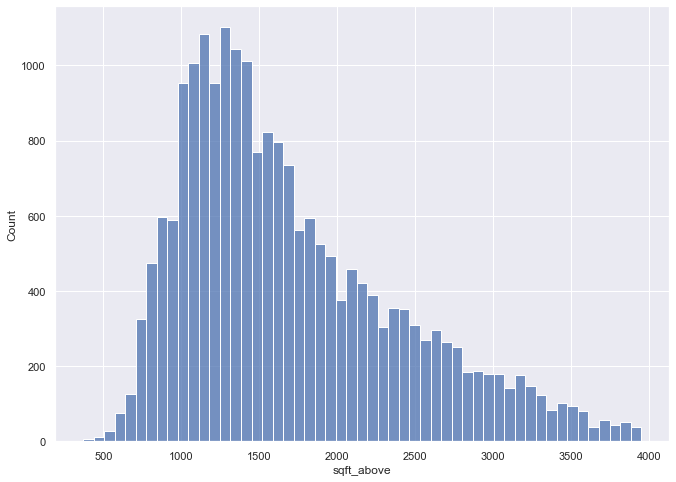

In [48]:
sns.histplot(df_out_rmv5["sqft_above"])

We see the new histogram display after removal of outliers.

#### Sqft_basement

In [49]:
df_out_rmv5.sqft_basement.describe()

count    20628.000000
mean       281.482839
std        419.645306
min          0.000000
25%          0.000000
50%          0.000000
75%        550.000000
max       2330.000000
Name: sqft_basement, dtype: float64

<AxesSubplot:xlabel='sqft_basement', ylabel='Count'>

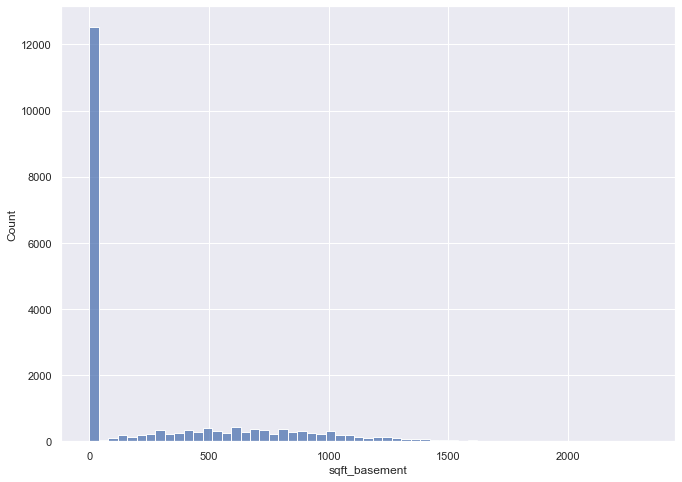

In [50]:
sns.histplot(df_out_rmv5["sqft_basement"])

Let's set up the upper and lower limits.

In [51]:
upper_limit = df_out_rmv5.sqft_basement.mean() + 3*df_out_rmv5.sqft_basement.std()
upper_limit

1540.4187563958521

In [52]:
lower_limit = df_out_rmv5.sqft_basement.mean() - 3*df_out_rmv5.sqft_basement.std()
lower_limit

-977.4530786762479

So, these are the two boundaries that will help discern what is and what isn't an outlier.

In [53]:
df_out_rmv5[(df_out_rmv5.sqft_basement>upper_limit)|(df_out_rmv5.sqft_basement<lower_limit)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10,1736800520,20150403,662500.0,3,2.50,3560,9796,1.0,0,0,...,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925
41,7766200013,20140811,775000.0,4,2.25,4220,24186,1.0,0,0,...,8,2600,1620,1984,0,98166,47.4450,-122.347,2410,30617
69,1802000060,20140612,1325000.0,5,2.25,3200,20158,1.0,0,0,...,8,1600,1600,1965,0,98004,47.6303,-122.215,3390,20158
115,3626039325,20141121,740500.0,3,3.50,4380,6350,2.0,0,0,...,8,2780,1600,1900,1999,98117,47.6981,-122.368,1830,6350
185,825059270,20141121,1095000.0,5,3.00,4090,12850,1.0,0,2,...,10,2090,2000,1986,0,98033,47.6627,-122.188,2540,10270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19262,1224049095,20150204,959000.0,6,3.25,4440,17424,1.0,0,1,...,9,2220,2220,1959,0,98040,47.5791,-122.230,2660,10768
19357,3585300194,20150324,1400000.0,5,3.25,4140,32700,1.0,0,4,...,10,2190,1950,1973,0,98177,47.7633,-122.369,3220,22077
19381,868000905,20140708,950000.0,3,2.50,3480,7800,1.0,0,0,...,7,1750,1730,1941,1998,98177,47.7047,-122.378,3010,9918
19683,1624049293,20140506,390000.0,5,3.75,2890,5000,1.0,0,0,...,7,1310,1580,2006,0,98108,47.5701,-122.296,1930,5117


Those entries below the "lower_limit" and above the "upper_limit".

In [54]:
df_out_rmv6 = df_out_rmv5[(df_out_rmv5.sqft_basement<upper_limit) & (df_out_rmv5.sqft_basement>lower_limit)]
df_out_rmv6

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


<AxesSubplot:xlabel='sqft_basement', ylabel='Count'>

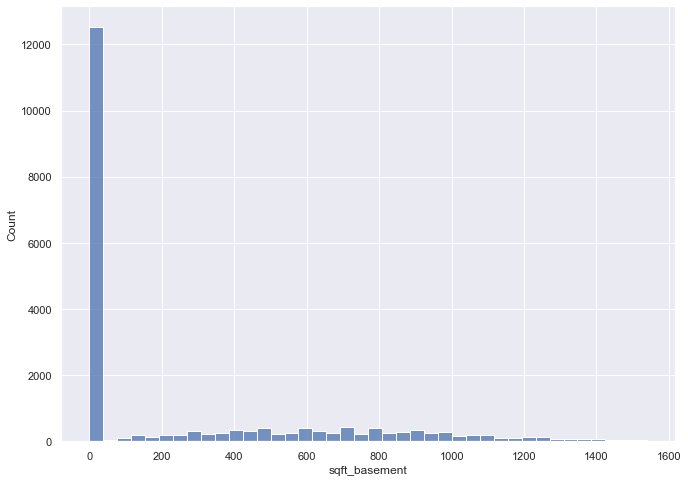

In [55]:
sns.histplot(df_out_rmv6["sqft_basement"])

We see the new histogram display after removal of outliers.

#### Sqft_living15

In [56]:
df_out_rmv6.sqft_living15.describe()

count    20431.000000
mean      1929.485635
std        620.284910
min        399.000000
25%       1470.000000
50%       1810.000000
75%       2290.000000
max       5790.000000
Name: sqft_living15, dtype: float64

<AxesSubplot:xlabel='sqft_living15', ylabel='Count'>

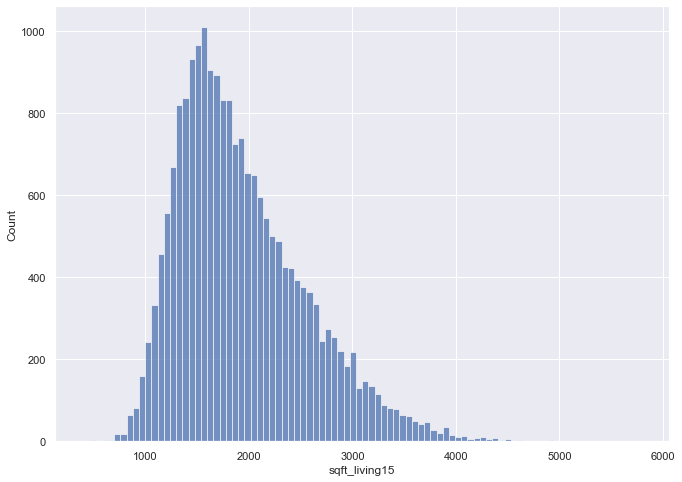

In [57]:
sns.histplot(df_out_rmv6["sqft_living15"])

Let's set up the upper and lower limits.

In [58]:
upper_limit = df_out_rmv6.sqft_living15.mean() + 3*df_out_rmv6.sqft_living15.std()
upper_limit

3790.340363999988

In [59]:
lower_limit = df_out_rmv6.sqft_living15.mean() - 3*df_out_rmv6.sqft_living15.std()
lower_limit

68.63090514983332

So, these are the two boundaries that will help discern what is and what isn't an outlier.

In [60]:
df_out_rmv6[(df_out_rmv6.sqft_living15>upper_limit)|(df_out_rmv6.sqft_living15<lower_limit)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21,2524049179,20140826,2000000.0,3,2.75,3050,44867,1.0,0,4,...,9,2330,720,1968,0,98040,47.5316,-122.233,4110,20336
216,46100204,20150221,1505000.0,5,3.00,3300,33474,1.0,0,3,...,9,1870,1430,1957,1991,98040,47.5673,-122.210,3836,20953
283,7202360350,20140630,780000.0,4,2.50,3500,7048,2.0,0,0,...,9,3500,0,2005,0,98053,47.6811,-122.025,3920,7864
473,8651610890,20141014,1150000.0,4,3.25,4190,10259,2.0,0,0,...,11,3150,1040,2000,0,98074,47.6332,-122.066,4300,11919
545,2944000240,20150422,910000.0,4,2.50,3350,29242,2.0,0,0,...,11,3350,0,1988,0,98052,47.7197,-122.131,3920,24728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21120,7853280250,20150424,820875.0,5,3.25,3860,9387,2.0,0,2,...,9,3860,0,2006,0,98065,47.5380,-121.858,3860,8979
21254,7852120050,20150311,729950.0,4,3.50,3510,10010,2.0,0,0,...,10,3510,0,2001,0,98065,47.5412,-121.876,4200,9935
21375,6061500100,20140717,1174660.0,6,3.50,4310,7760,2.0,0,0,...,10,3260,1050,2013,0,98059,47.5297,-122.155,4620,10217
21524,6453550090,20150505,861111.0,4,2.50,3650,7090,2.0,0,0,...,10,3650,0,2008,0,98074,47.6060,-122.052,3860,7272


Those entries below the "lower_limit" and above the "upper_limit".

In [61]:
df_out_rmv7 = df_out_rmv6[(df_out_rmv6.sqft_living15<upper_limit) & (df_out_rmv6.sqft_living15>lower_limit)]
df_out_rmv7

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


<AxesSubplot:xlabel='sqft_living15', ylabel='Count'>

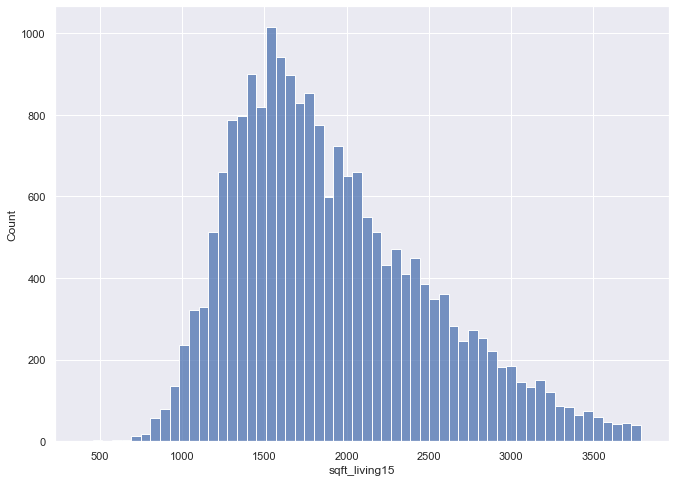

In [62]:
sns.histplot(df_out_rmv7["sqft_living15"])

We see the new histogram display after removal of outliers.

#### Sqft_lot15

In [63]:
df_out_rmv7.sqft_lot15.describe()

count     20276.000000
mean      10047.716068
std       15337.200265
min         651.000000
25%        5000.000000
50%        7491.500000
75%        9709.000000
max      434728.000000
Name: sqft_lot15, dtype: float64

<AxesSubplot:xlabel='sqft_lot15', ylabel='Count'>

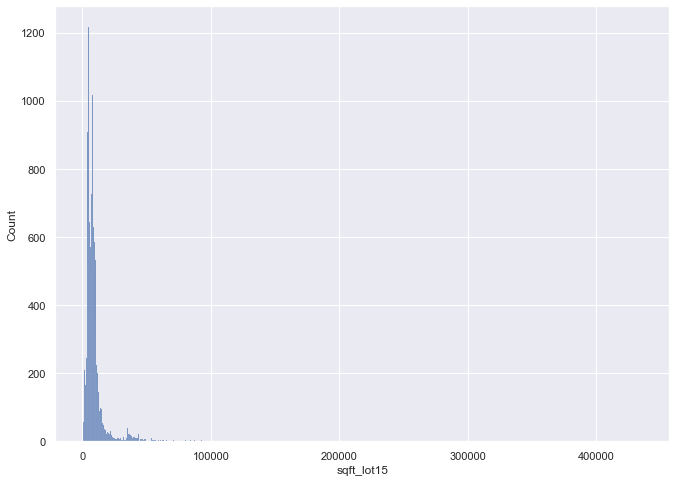

In [64]:
sns.histplot(df_out_rmv7["sqft_lot15"])

Let's set up the upper and lower limits.

In [65]:
upper_limit = df_out_rmv7.sqft_lot15.mean() + 3*df_out_rmv7.sqft_lot15.std()
upper_limit

56059.31686203611

In [66]:
lower_limit = df_out_rmv7.sqft_lot15.mean() - 3*df_out_rmv7.sqft_lot15.std()
lower_limit

-35963.88472552004

So, these are the two boundaries that will help discern what is and what isn't an outlier.

In [67]:
df_out_rmv7[(df_out_rmv7.sqft_lot15>upper_limit)|(df_out_rmv7.sqft_lot15<lower_limit)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
49,822039084,20150311,1350000.0,3,2.50,2753,65005,1.0,1,2,...,9,2165,588,1953,0,98070,47.4041,-122.451,2680,72513
98,722079104,20140711,314000.0,3,1.75,1810,41800,1.0,0,0,...,7,1210,600,1980,0,98038,47.4109,-121.958,1650,135036
132,1243100136,20140612,784000.0,3,3.50,3950,111078,1.5,0,0,...,9,2460,1490,1989,0,98052,47.6970,-122.072,2480,88500
147,3224079105,20140806,430000.0,2,2.50,2420,60984,2.0,0,0,...,7,2420,0,2007,0,98027,47.5262,-121.943,1940,193842
198,2824079053,20150113,440000.0,3,2.50,1910,66211,2.0,0,0,...,7,1910,0,1997,0,98024,47.5385,-121.911,2330,67268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20754,323079065,20140624,790000.0,4,3.50,3190,31450,2.0,0,0,...,9,3190,0,2010,0,98027,47.5010,-121.902,3000,72745
20861,1425069103,20140718,750000.0,3,2.50,2620,43832,2.0,0,0,...,8,2620,0,2013,0,98053,47.6550,-122.009,2620,120686
21287,123059127,20140502,625000.0,4,3.25,2730,54014,1.0,0,0,...,9,1560,1170,2007,0,98059,47.5133,-122.110,2730,111274
21361,3123089027,20140721,472000.0,3,2.50,3800,104979,2.0,0,0,...,8,3210,590,2005,0,98045,47.4304,-121.841,2040,109771


Those entries below the "lower_limit" and above the "upper_limit".

In [68]:
df_out_rmv_all = df_out_rmv7[(df_out_rmv7.sqft_lot15<upper_limit) & (df_out_rmv7.sqft_lot15>lower_limit)]
df_out_rmv_all

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


<AxesSubplot:xlabel='sqft_lot15', ylabel='Count'>

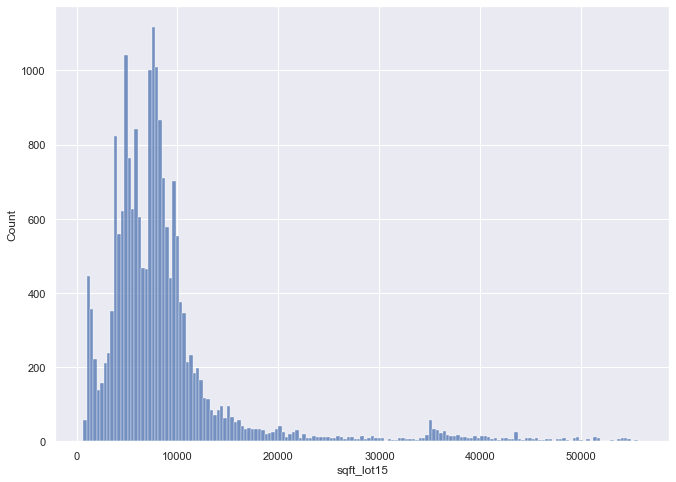

In [69]:
sns.histplot(df_out_rmv_all["sqft_lot15"])

We see the new histogram display after removal of outliers.

In [70]:
df_out_rmv_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20012 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20012 non-null  int64  
 1   date           20012 non-null  int32  
 2   price          20012 non-null  float64
 3   bedrooms       20012 non-null  int64  
 4   bathrooms      20012 non-null  float64
 5   sqft_living    20012 non-null  int64  
 6   sqft_lot       20012 non-null  int64  
 7   floors         20012 non-null  float64
 8   waterfront     20012 non-null  int64  
 9   view           20012 non-null  int64  
 10  condition      20012 non-null  int64  
 11  grade          20012 non-null  int64  
 12  sqft_above     20012 non-null  int64  
 13  sqft_basement  20012 non-null  int64  
 14  yr_built       20012 non-null  int64  
 15  yr_renovated   20012 non-null  int64  
 16  zipcode        20012 non-null  int64  
 17  lat            20012 non-null  float64
 18  long  

###### So after all the outliers are removed, we are left with 20012 non-null entries in our dataframe, now renamed as "df_out_rmv_all", indicated by our .info().

#### Location

We can plot the data from "df_out_rmv_all" to see the location of each house in respective of its "price"

[Text(0.5, 0, 'Longitude'),
 Text(0, 0.5, 'Latitude'),
 Text(0.5, 1.0, 'Price by Location')]

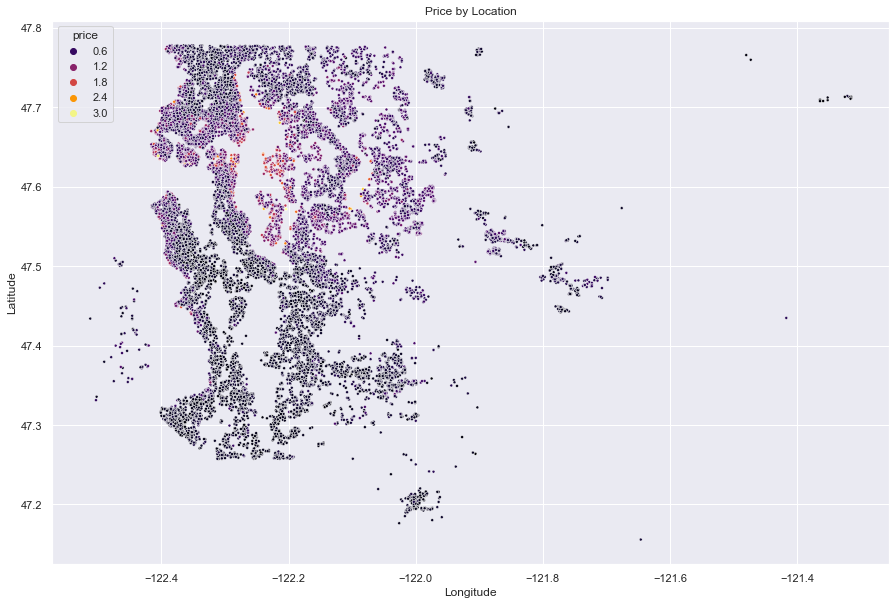

In [71]:
fig = plt.figure(figsize=(15,10))
ax = sns.scatterplot(x=df_out_rmv_all["long"], y=df_out_rmv_all["lat"], hue=df_out_rmv_all["price"], palette="inferno",
                     marker=".")
ax.set( xlabel="Longitude",
        ylabel="Latitude", 
        title="Price by Location")

To be honest, the graphical plot isn't that indicative of location being a huge contributor to price. There seems to be just pockets of above 1.2 million USD homes and the majority of homes priced at, less than or equal to 1.2 million USD.

In [72]:
df_out_rmv_all["price"].describe()

count    2.001200e+04
mean     4.984623e+05
std      2.714147e+05
min      7.500000e+04
25%      3.150000e+05
50%      4.380000e+05
75%      6.100000e+05
max      3.100000e+06
Name: price, dtype: float64

And all these prices shown on the scatter plot are in millions of $ (2014 - 2015 USD). Our max is at 3.1 million dollars here displayed by our .describe() function.

From our scatter plot of location and the .describe() function, it would appear that we may have skewed distribution of prices. Let's see a histogram plot of price.

<AxesSubplot:xlabel='price', ylabel='Count'>

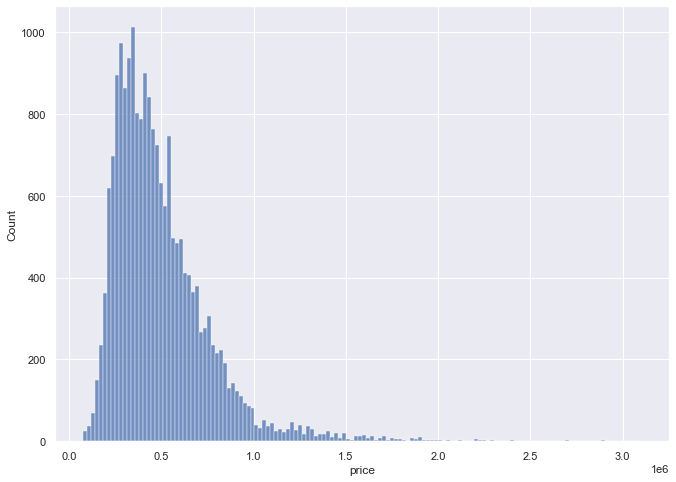

In [73]:
sns.histplot(df_out_rmv_all["price"])

After the other features with max well over the 75 percentile removed of their outliers. We will revisit the features we had put aside before.

These features include "price", "grade", "condition", "yr_built", "yr_renovated", "zipcode", "lat", "long" 
that were not included as features needing to remove outliers, before. 
Let's see their distributions now.

#### Price

Let's set up the upper and lower limits.

In [74]:
upper_limit = df_out_rmv_all.price.mean() + 3*df_out_rmv_all.price.std()
upper_limit

1312706.4874396157

In [75]:
lower_limit = df_out_rmv_all.price.mean() - 3*df_out_rmv_all.price.std()
lower_limit

-315781.97844501253

So, these are the two boundaries that will help discern what is and what isn't an outlier.

In [76]:
df_out_rmv_all[(df_out_rmv_all.price>upper_limit)|(df_out_rmv_all.price<lower_limit)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
125,4389200955,20150302,1450000.0,4,2.75,2750,17789,1.5,0,0,...,8,1980,770,1914,1992,98004,47.6141,-122.212,3060,11275
282,7424700045,20150513,2050000.0,5,3.00,3830,8480,2.0,0,1,...,9,2630,1200,1905,1994,98122,47.6166,-122.287,3050,7556
312,1860600135,20140502,2384000.0,5,2.50,3650,9050,2.0,0,4,...,10,3370,280,1921,0,98119,47.6345,-122.367,2880,5400
551,1373800295,20141013,1450000.0,3,3.00,4380,6320,2.0,0,3,...,10,3580,800,1952,0,98199,47.6452,-122.411,3080,7680
947,2925059135,20150408,1321500.0,3,3.00,2230,12968,2.0,0,0,...,9,2230,0,1990,0,98004,47.6271,-122.197,2260,10160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21473,8085400586,20141101,1750000.0,4,2.75,3560,8975,2.0,0,0,...,10,3560,0,2014,0,98004,47.6322,-122.209,3440,12825
21505,9468200109,20140617,1555000.0,3,3.50,4360,6240,2.0,0,3,...,10,2960,1400,2008,0,98103,47.6791,-122.354,1920,3910
21514,3262300818,20150227,1865000.0,4,3.75,3790,8797,2.0,0,0,...,11,3290,500,2006,0,98039,47.6351,-122.236,2660,12150
21568,524059330,20150130,1700000.0,4,3.50,3830,8963,2.0,0,0,...,10,3120,710,2014,0,98004,47.5990,-122.197,2190,10777


Those entries below the "lower_limit" and above the "upper_limit".

In [77]:
df_new_1 = df_out_rmv_all[(df_out_rmv_all.price<upper_limit) & (df_out_rmv_all.price>lower_limit)]
df_new_1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


<AxesSubplot:xlabel='price', ylabel='Count'>

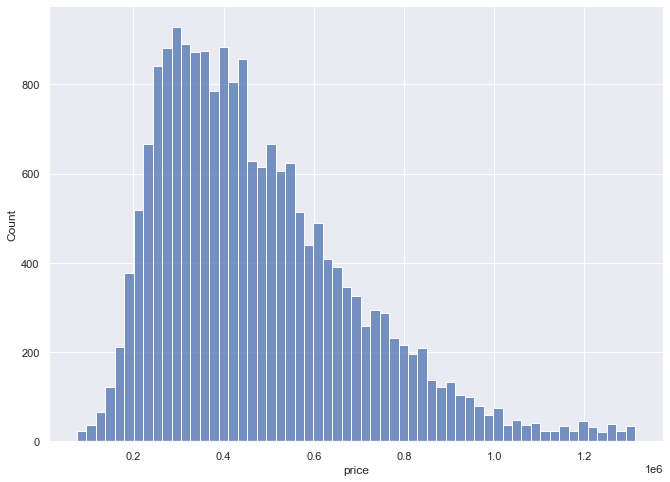

In [78]:
sns.histplot(df_new_1["price"])

Much tighter distribution compared to before removing outliers.

#### New Price and Location

Even though, this won't be our final plot for price and location distribution, let's see the difference with outliers removed.

[Text(0.5, 0, 'Longitude'),
 Text(0, 0.5, 'Latitude'),
 Text(0.5, 1.0, 'Price by Location')]

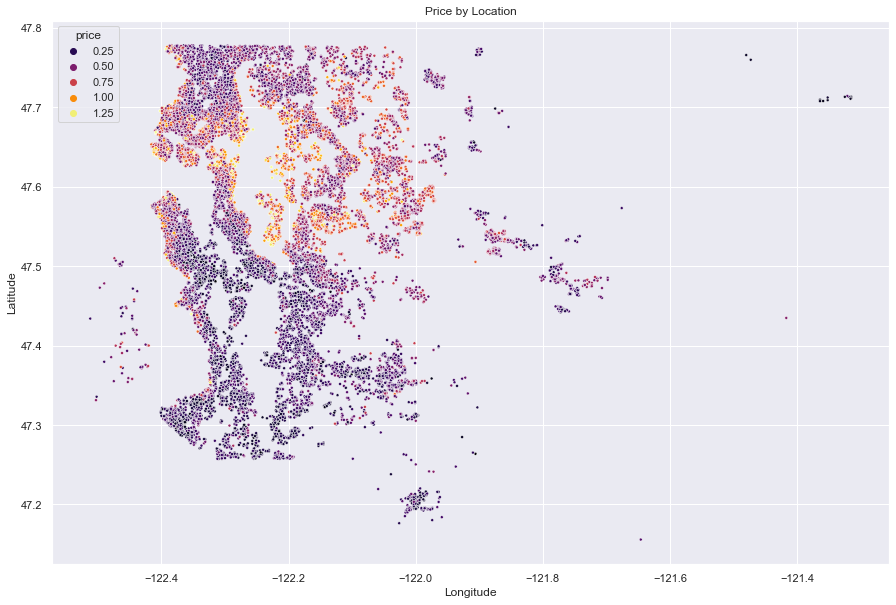

In [79]:
fig = plt.figure(figsize=(15,10))
ax = sns.scatterplot(x=df_new_1["long"], y=df_new_1["lat"], hue=df_new_1["price"], palette="inferno",
                     marker=".")
ax.set( xlabel="Longitude",
        ylabel="Latitude", 
        title="Price by Location")

In [80]:
df_new_1["price"].describe()

count    1.965300e+04
mean     4.772380e+05
std      2.184449e+05
min      7.500000e+04
25%      3.125000e+05
50%      4.330000e+05
75%      5.999500e+05
max      1.312000e+06
Name: price, dtype: float64

Much better distribution of prices and the plot gives us a better perspective regarding location relation to home price.

Let's move on to the outliers of those other features we left out before.

#### Grade

In [81]:
df_new_1["grade"].describe()

count    19653.000000
mean         7.501705
std          1.003991
min          3.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         11.000000
Name: grade, dtype: float64

<AxesSubplot:xlabel='grade', ylabel='Count'>

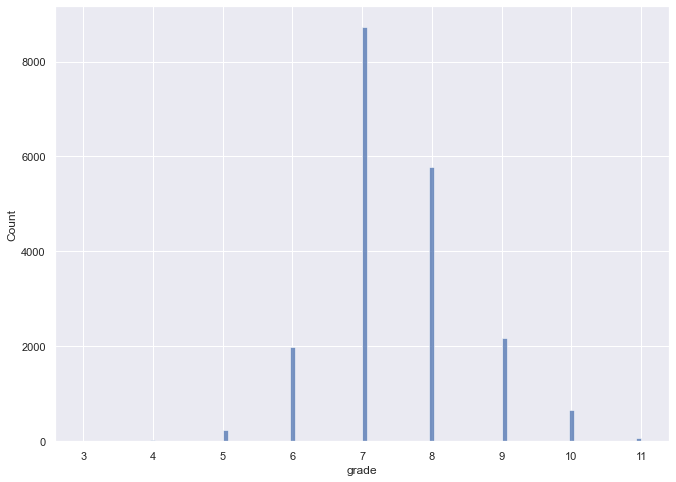

In [82]:
sns.histplot(df_new_1["grade"])

Let's set up the upper and lower limits.

In [83]:
upper_limit = df_new_1.grade.mean() + 3*df_new_1.grade.std()
upper_limit

10.513678913472344

In [84]:
lower_limit = df_new_1.grade.mean() - 3*df_new_1.grade.std()
lower_limit

4.489730235258131

So, these are the two boundaries that will help discern what is and what isn't an outlier.

In [85]:
df_new_1[(df_new_1.grade>upper_limit)|(df_new_1.grade<lower_limit)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
350,7325600160,20140604,299000.0,1,0.75,560,12120,1.0,0,0,...,4,560,0,1967,0,98014,47.6750,-121.854,1300,19207
465,8658300340,20140523,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500
587,7504010570,20140708,900000.0,3,2.50,3180,12600,2.0,0,0,...,11,3180,0,1978,0,98074,47.6366,-122.058,3030,12835
1066,3340401535,20141105,140000.0,1,1.00,730,6890,1.0,0,0,...,4,730,0,1926,0,98055,47.4670,-122.215,1790,7969
1149,3421079032,20150217,75000.0,1,0.00,670,43377,1.0,0,0,...,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19619,6817850110,20150421,785000.0,4,2.50,3210,24527,1.5,0,0,...,11,3210,0,1984,0,98074,47.6399,-122.052,3280,24527
19816,9477580030,20141014,962000.0,4,2.75,3340,5700,2.0,0,0,...,11,3340,0,2013,0,98059,47.5059,-122.146,3340,6940
20087,9477580110,20140626,971971.0,4,3.75,3460,6738,2.0,0,0,...,11,3460,0,2013,0,98059,47.5060,-122.145,3340,6120
20921,3864000120,20150408,1175000.0,4,3.25,3780,10099,1.0,0,1,...,11,2240,1540,2006,0,98006,47.5508,-122.192,3120,10669


Those entries below the "lower_limit" and above the "upper_limit".

In [86]:
df_new_2 = df_new_1[(df_new_1.grade<upper_limit) & (df_new_1.grade>lower_limit)]
df_new_2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


<AxesSubplot:xlabel='grade', ylabel='Count'>

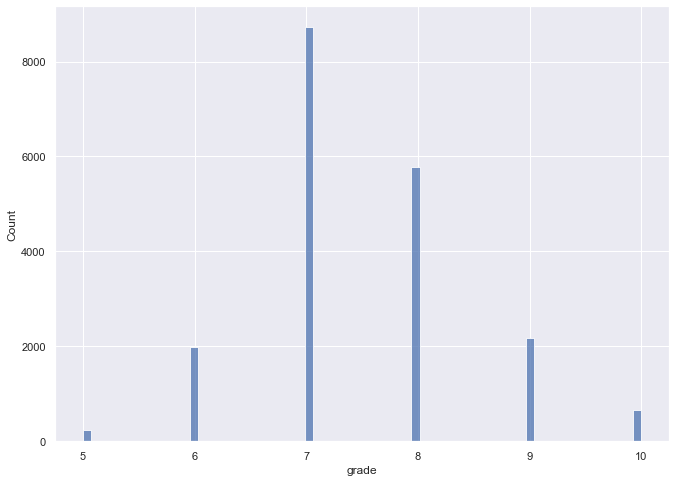

In [87]:
sns.histplot(df_new_2["grade"])

#### Condition

In [88]:
df_new_2["condition"].describe()

count    19549.000000
mean         3.412962
std          0.650084
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: condition, dtype: float64

<AxesSubplot:xlabel='condition', ylabel='Count'>

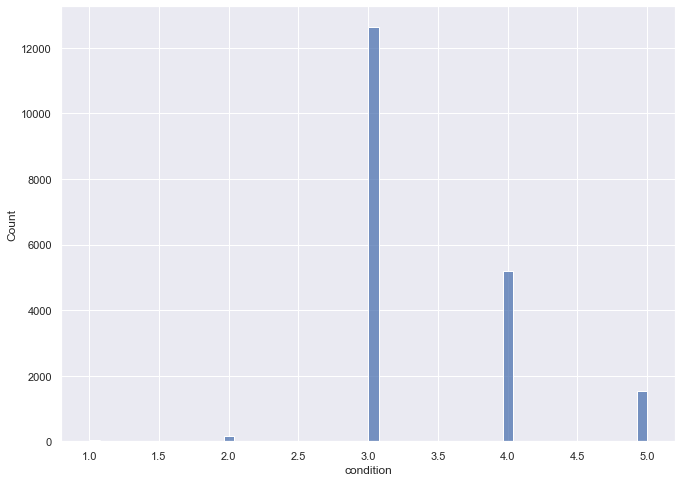

In [89]:
sns.histplot(df_new_2["condition"])

Let's set up the upper and lower limits.

In [90]:
upper_limit = df_new_2.condition.mean() + 3*df_new_2.condition.std()
upper_limit

5.3632131872042414

In [91]:
lower_limit = df_new_2.condition.mean() - 3*df_new_2.condition.std()
lower_limit

1.4627114125195289

So, these are the two boundaries that will help discern what is and what isn't an outlier.

In [92]:
df_new_2[(df_new_2.condition>upper_limit)|(df_new_2.condition<lower_limit)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
36,9435300030,20140528,550000.0,4,1.00,1660,34848,1.0,0,0,...,5,930,730,1933,0,98052,47.6621,-122.132,2160,11467
397,5175800060,20140623,365000.0,4,2.00,1940,25600,1.0,0,0,...,8,1940,0,1962,0,98006,47.5722,-122.129,2000,10071
1442,5694000710,20141107,352950.0,3,1.00,1760,3000,1.5,0,0,...,6,1760,0,1900,0,98103,47.6598,-122.348,1320,1266
1734,913000340,20150102,252000.0,1,1.00,680,1638,1.0,0,4,...,6,680,0,1910,1992,98116,47.5832,-122.399,1010,3621
2223,3886902445,20150316,535000.0,2,1.00,920,9000,1.0,0,0,...,6,920,0,1954,0,98033,47.6831,-122.189,1760,8400
3004,9187200245,20141231,441000.0,4,1.50,1100,3300,1.0,0,0,...,7,1100,0,1919,0,98122,47.6033,-122.295,2020,4000
3202,723049596,20140509,255000.0,2,1.00,810,7980,1.0,0,0,...,6,810,0,1928,0,98146,47.4890,-122.337,1440,7980
3975,6324000090,20150511,210000.0,2,1.00,990,8140,1.0,0,0,...,6,990,0,1910,0,98116,47.5828,-122.382,2150,5000
4651,859000110,20141002,125000.0,1,1.00,500,7440,1.0,0,0,...,5,500,0,1928,0,98106,47.5252,-122.362,1350,7440
7376,9275200080,20141107,295000.0,3,1.50,720,7450,1.0,0,1,...,5,720,0,1924,0,98126,47.5840,-122.375,2600,7360


Those entries below the "lower_limit" and above the "upper_limit".

In [93]:
df_new_3 = df_new_2[(df_new_2.condition<upper_limit) & (df_new_2.condition>lower_limit)]
df_new_3

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


<AxesSubplot:xlabel='condition', ylabel='Count'>

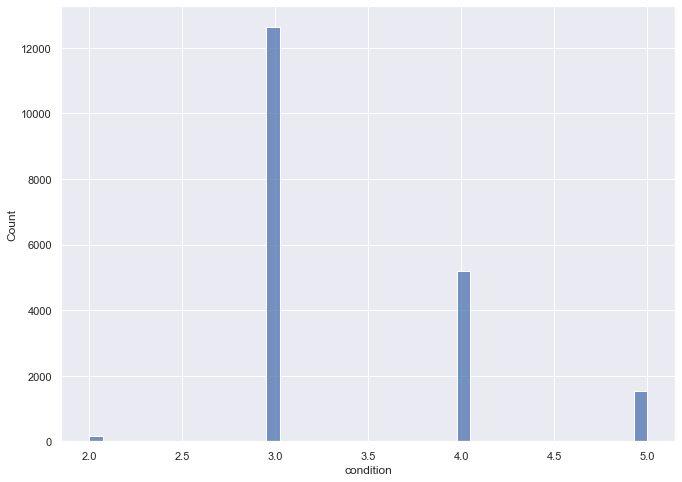

In [94]:
sns.histplot(df_new_3["condition"])

#### Yr_Built

In [95]:
df_new_3["yr_built"].describe()

count    19523.000000
mean      1970.191262
std         29.369490
min       1900.000000
25%       1951.000000
50%       1973.000000
75%       1995.000000
max       2015.000000
Name: yr_built, dtype: float64

<AxesSubplot:xlabel='yr_built', ylabel='Count'>

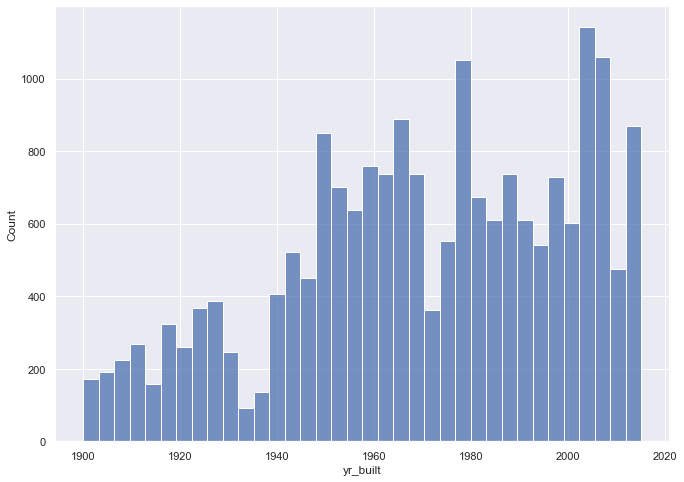

In [96]:
sns.histplot(df_new_3["yr_built"])

Let's set up the upper and lower limits.

In [97]:
upper_limit = df_new_3.yr_built.mean() + 3*df_new_3.yr_built.std()
upper_limit

2058.2997315122725

In [98]:
lower_limit = df_new_3.yr_built.mean() - 3*df_new_3.yr_built.std()
lower_limit

1882.082791665518

So, these are the two boundaries that will help discern what is and what isn't an outlier.

In [99]:
df_new_3[(df_new_3.yr_built>upper_limit)|(df_new_3.yr_built<lower_limit)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


No outliers to remove for yr_built.

#### Yr_renovated

In [100]:
df_new_3["yr_renovated"].describe()

count    19523.000000
mean        76.868770
std        384.070294
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

<AxesSubplot:xlabel='yr_renovated', ylabel='Count'>

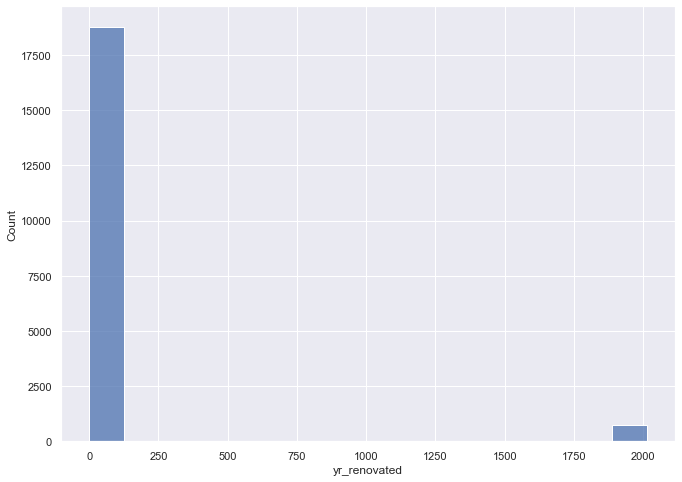

In [101]:
sns.histplot(df_new_3["yr_renovated"])

This feature "yr_renovated" doesn't seem to have much of a distribution. We will see if it has a correlation later on with price.

#### Zipcode

In [102]:
df_new_3["zipcode"].describe()

count    19523.000000
mean     98080.049480
std         53.765175
min      98001.000000
25%      98033.000000
50%      98072.000000
75%      98118.000000
max      98199.000000
Name: zipcode, dtype: float64

<AxesSubplot:xlabel='zipcode', ylabel='Count'>

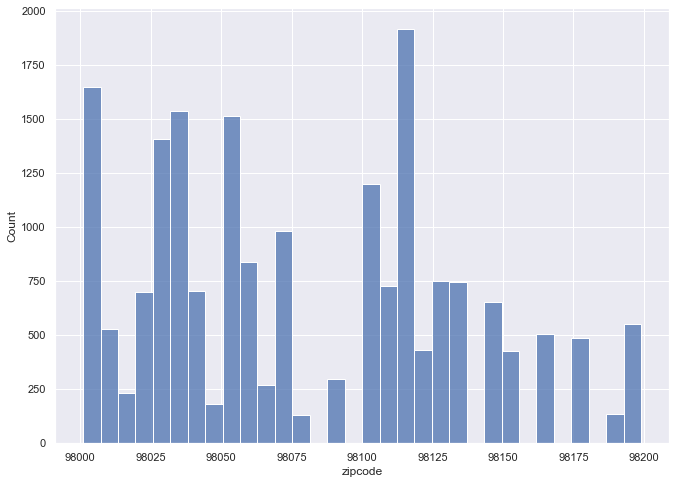

In [103]:
sns.histplot(df_new_3["zipcode"])

Let's set up the upper and lower limits.

In [104]:
upper_limit = df_new_3.zipcode.mean() + 3*df_new_3.zipcode.std()
upper_limit

98241.34500381285

In [105]:
lower_limit = df_new_3.zipcode.mean() - 3*df_new_3.zipcode.std()
lower_limit

97918.75395638794

So, these are the two boundaries that will help discern what is and what isn't an outlier.

In [106]:
df_new_3[(df_new_3.zipcode>upper_limit)|(df_new_3.zipcode<lower_limit)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


No outliers for zipcode either.

#### Floors

In [107]:
df_new_3["floors"].describe()

count    19523.000000
mean         1.474210
std          0.539129
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          3.500000
Name: floors, dtype: float64

<AxesSubplot:xlabel='floors', ylabel='Count'>

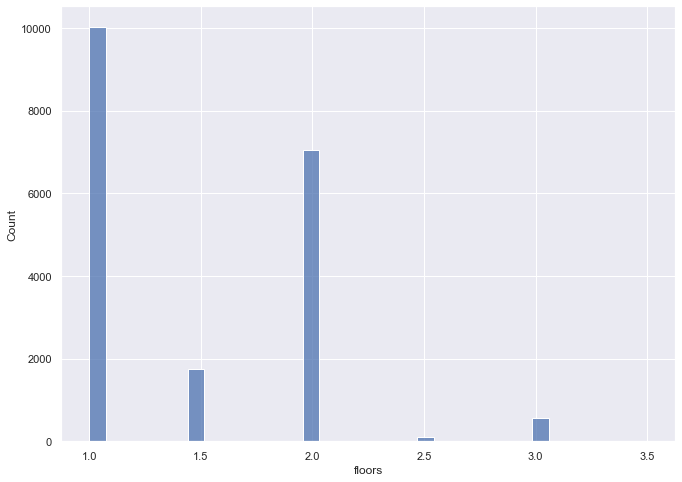

In [108]:
sns.histplot(df_new_3["floors"])

Let's set up the upper and lower limits.

In [109]:
upper_limit = df_new_3.floors.mean() + 3*df_new_3.floors.std()
upper_limit

3.0915967113796143

In [110]:
lower_limit = df_new_3.floors.mean() - 3*df_new_3.floors.std()
lower_limit

-0.1431768988508022

So, these are the two boundaries that will help discern what is and what isn't an outlier.

In [111]:
df_new_3[(df_new_3.floors>upper_limit)|(df_new_3.floors<lower_limit)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10077,1972202010,20140801,435000.0,3,3.00,1440,1350,3.5,0,2,...,8,1440,0,2005,0,98103,47.6525,-122.345,1440,1350
11594,3180100023,20150130,544000.0,3,2.50,1760,1755,3.5,0,0,...,8,1760,0,1998,0,98105,47.6688,-122.279,1700,1721
14885,8673400177,20150402,525000.0,3,3.00,1730,1074,3.5,0,0,...,8,1730,0,2006,0,98107,47.6692,-122.392,1370,1185
15424,1702900664,20150416,479000.0,2,2.50,1730,1037,3.5,0,0,...,8,1730,0,2008,0,98118,47.5594,-122.285,1280,1026
20308,1972200426,20140918,525000.0,2,2.75,1310,1268,3.5,0,0,...,8,1310,0,2007,0,98103,47.6534,-122.355,1350,1288
20772,1972200428,20140625,563500.0,3,2.50,1400,1312,3.5,0,0,...,8,1400,0,2007,0,98103,47.6534,-122.355,1350,1312


Those entries below the "lower_limit" and above the "upper_limit".

In [112]:
df_new_4 = df_new_3[(df_new_3.floors<upper_limit) & (df_new_3.floors>lower_limit)]
df_new_4

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


<AxesSubplot:xlabel='floors', ylabel='Count'>

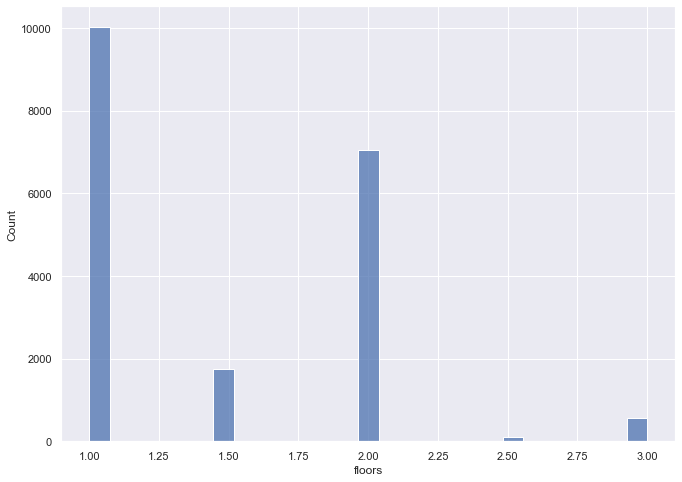

In [113]:
sns.histplot(df_new_4["floors"])

Doesn't help the distribution all that much but the real question is if there is a correlation between the number of floors and the resulting price of the home. 

Now outliers have been removed for all the features, we need need to test the features for their correlation to price.

NOTE: Exception are the "view" and "waterfront" features. Again, we didn't remove outliers for these reasons:

* "view" is how many times the house was viewed. This isn't really relevant but will be confirmed with the .corr().   
               And they are just counts of the times viewed, not really applicable to eliminate outliers for. 


* "waterfront" is based on presence or absence of a waterfront. The "1" and "0" are indicative of presence of 
               waterfront. No outliers there. 

## Exploratory Analysis - Feature selection

#### Correlation with Target Method

Simplifying the dataset means removing columns that might not be relevant for our current analysis.

If we are trying to investigate factors that affect the price and value of a home: 

1. So, "id" and "date" are irrelevant because they aren't really features pertaining to the house, not components of the house.
REMOVED "id" and "date"


So that leaves us with 18 other features (18 other columns excluding "price) to account for in our model.

To start, we can look at correlation between pairs of features to try to get an idea from there, what features may the most helpful in our model.

In [114]:
df_new_4.corr()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.008071,0.014282,0.007575,0.034359,0.025115,-0.108911,0.030503,0.007428,0.026049,...,0.041806,0.029094,-0.004530,0.034606,-0.015911,-0.021441,-0.008315,0.052868,0.022711,-0.096526
date,0.008071,1.000000,0.003869,-0.006792,-0.030503,-0.031233,-0.015005,-0.018903,-0.005958,0.001815,...,-0.038491,-0.024234,-0.015028,0.001325,-0.023594,0.002215,-0.030988,-0.001891,-0.023275,-0.011890
price,0.014282,0.003869,1.000000,0.285597,0.423156,0.597328,0.077649,0.259499,0.077003,0.267184,...,0.606736,0.486762,0.247124,0.011254,0.108492,0.007821,0.440351,0.013771,0.529477,0.076738
bedrooms,0.007575,-0.006792,0.285597,1.000000,0.485217,0.607662,0.108213,0.155866,-0.034509,0.033947,...,0.321486,0.479589,0.278367,0.162601,0.009531,-0.161114,-0.040672,0.150313,0.389960,0.119150
bathrooms,0.034359,-0.030503,0.423156,0.485217,1.000000,0.702401,0.039193,0.510656,-0.006170,0.088719,...,0.603100,0.617528,0.212532,0.542899,0.034727,-0.203716,-0.008547,0.235890,0.514346,0.047359
sqft_living,0.025115,-0.031233,0.597328,0.607662,0.702401,1.000000,0.208470,0.346526,0.006455,0.163708,...,0.685416,0.842777,0.365507,0.334535,0.038295,-0.192676,0.021481,0.253718,0.725361,0.226225
sqft_lot,-0.108911,-0.015005,0.077649,0.108213,0.039193,0.208470,1.000000,-0.121740,0.058237,0.061395,...,0.114941,0.196700,0.039872,0.015487,0.018042,-0.178609,-0.070122,0.257958,0.257448,0.809240
floors,0.030503,-0.018903,0.259499,0.155866,0.510656,0.346526,-0.121740,1.000000,0.001079,-0.006976,...,0.462734,0.537641,-0.298049,0.504706,0.003212,-0.061112,0.032984,0.129386,0.259752,-0.130768
waterfront,0.007428,-0.005958,0.077003,-0.034509,-0.006170,0.006455,0.058237,0.001079,1.000000,0.317991,...,-0.001634,-0.002898,0.016779,-0.036065,0.064062,0.051638,-0.036102,-0.050233,0.019810,0.077628
view,0.026049,0.001815,0.267184,0.033947,0.088719,0.163708,0.061395,-0.006976,0.317991,1.000000,...,0.139672,0.061422,0.192210,-0.080793,0.080739,0.123296,0.000119,-0.105878,0.193915,0.055162


So even with correlation values with each pair of variables, it's still a lot of information to digest.
What are we looking for? : 
High absolute values in the "price" row/column

To make it easier for us to discern, let's use a heatmap.

<AxesSubplot:>

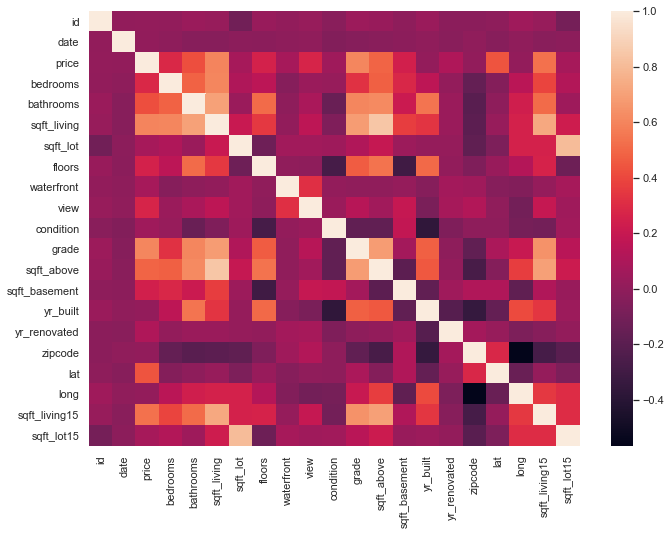

In [115]:
sns.heatmap(df_new_4.corr())

Still a bit cluttered. (The lighter colors along the "price" row/column, represent the positive correlations between price and another variable).

Isolating the "price" column can give us a better visual to draw conclusions from.

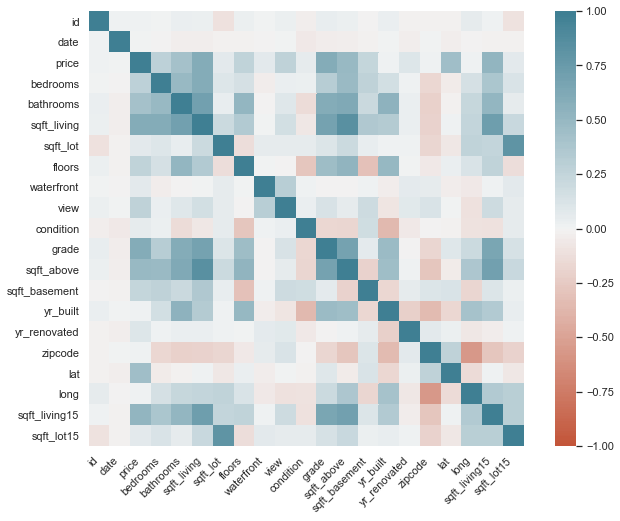

In [116]:
corr = df_new_4.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [117]:
price_corrs = df_new_4.corr()["price"].map(abs).sort_values(ascending=False)
price_corrs

price            1.000000
grade            0.606736
sqft_living      0.597328
sqft_living15    0.529477
sqft_above       0.486762
lat              0.440351
bathrooms        0.423156
bedrooms         0.285597
view             0.267184
floors           0.259499
sqft_basement    0.247124
yr_renovated     0.108492
sqft_lot         0.077649
waterfront       0.077003
sqft_lot15       0.076738
condition        0.057303
id               0.014282
long             0.013771
yr_built         0.011254
zipcode          0.007821
date             0.003869
Name: price, dtype: float64

This shows that there are "price" and the following variables have the least correlation:
* zipcode: this may be helpful if we were able to plot location of each home and see the price spectrum. Zipcode would be more 
  digestible to people trying to understand distribution of the prices for specific areas than using coordinates alone.
* yr_built
* id
*     long: I think again "lat" and "long" by themselves may not show correlation to price.
* date
* condition
* sqft_lot
* sqft_lot15
* yr_renovated


Those features listed above were all displayed in the latter end of the spectrum, mostly in purple, representing the least correlation with "price".

However, there are two features that should be dropped because of being little to no distribution.

The list includes "yr_renovated", "view" 

* "view" also is to be dropped, since there were mostly "0"s and with a "4"s from the values.


* "yr_renovated" also had very disproportionate list of values with only a majority "0"s and "2015"


* "waterfront" no distribution

In [118]:
df_new_4["yr_renovated"].describe()

count    19517.000000
mean        76.892401
std        384.126963
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

<AxesSubplot:xlabel='yr_renovated', ylabel='Count'>

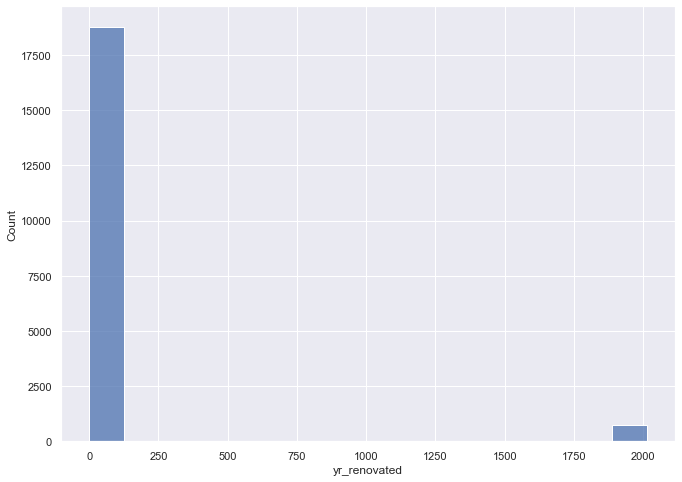

In [119]:
sns.histplot(df_new_4["yr_renovated"])

In [120]:
df_new_4["view"].describe()

count    19517.000000
mean         0.166265
std          0.631931
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64

<AxesSubplot:xlabel='view', ylabel='Count'>

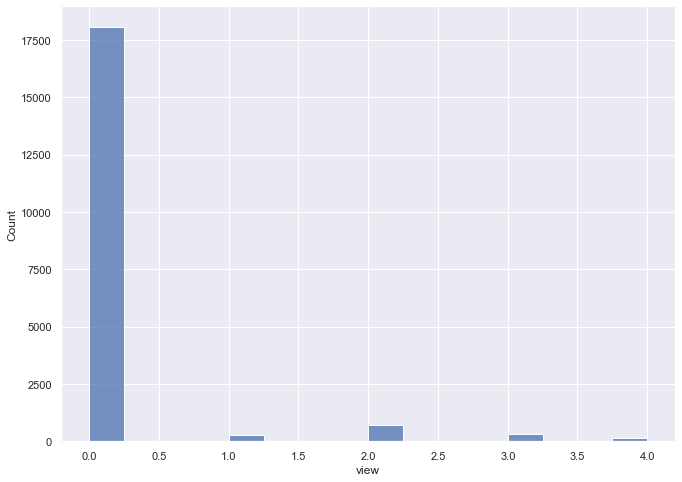

In [121]:
sns.histplot(df_new_4["view"])

In [122]:
df_new_4["waterfront"].describe()

count    19517.000000
mean         0.003177
std          0.056274
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: waterfront, dtype: float64

<AxesSubplot:xlabel='waterfront', ylabel='Count'>

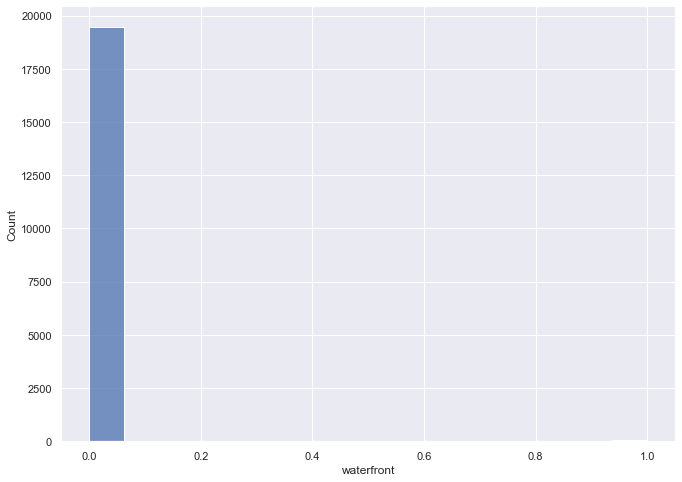

In [123]:
sns.histplot(df_new_4["waterfront"])

In [124]:
df_clean = df_new_4.copy()

In [125]:
df_clean = df_clean.drop(columns=["yr_renovated","view", "waterfront"])

In [126]:
df_clean.corr()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.008071,0.014282,0.007575,0.034359,0.025115,-0.108911,0.030503,-0.027237,0.041806,0.029094,-0.004530,0.034606,-0.021441,-0.008315,0.052868,0.022711,-0.096526
date,0.008071,1.000000,0.003869,-0.006792,-0.030503,-0.031233,-0.015005,-0.018903,-0.047982,-0.038491,-0.024234,-0.015028,0.001325,0.002215,-0.030988,-0.001891,-0.023275,-0.011890
price,0.014282,0.003869,1.000000,0.285597,0.423156,0.597328,0.077649,0.259499,0.057303,0.606736,0.486762,0.247124,0.011254,0.007821,0.440351,0.013771,0.529477,0.076738
bedrooms,0.007575,-0.006792,0.285597,1.000000,0.485217,0.607662,0.108213,0.155866,0.024083,0.321486,0.479589,0.278367,0.162601,-0.161114,-0.040672,0.150313,0.389960,0.119150
bathrooms,0.034359,-0.030503,0.423156,0.485217,1.000000,0.702401,0.039193,0.510656,-0.138658,0.603100,0.617528,0.212532,0.542899,-0.203716,-0.008547,0.235890,0.514346,0.047359
sqft_living,0.025115,-0.031233,0.597328,0.607662,0.702401,1.000000,0.208470,0.346526,-0.064314,0.685416,0.842777,0.365507,0.334535,-0.192676,0.021481,0.253718,0.725361,0.226225
sqft_lot,-0.108911,-0.015005,0.077649,0.108213,0.039193,0.208470,1.000000,-0.121740,0.048688,0.114941,0.196700,0.039872,0.015487,-0.178609,-0.070122,0.257958,0.257448,0.809240
floors,0.030503,-0.018903,0.259499,0.155866,0.510656,0.346526,-0.121740,1.000000,-0.276050,0.462734,0.537641,-0.298049,0.504706,-0.061112,0.032984,0.129386,0.259752,-0.130768
condition,-0.027237,-0.047982,0.057303,0.024083,-0.138658,-0.064314,0.048688,-0.276050,1.000000,-0.171462,-0.173673,0.183090,-0.364941,-0.007368,-0.009448,-0.094516,-0.105563,0.061513
grade,0.041806,-0.038491,0.606736,0.321486,0.603100,0.685416,0.114941,0.462734,-0.171462,1.000000,0.685651,0.063764,0.475833,-0.174132,0.096857,0.201726,0.649845,0.146003


<AxesSubplot:>

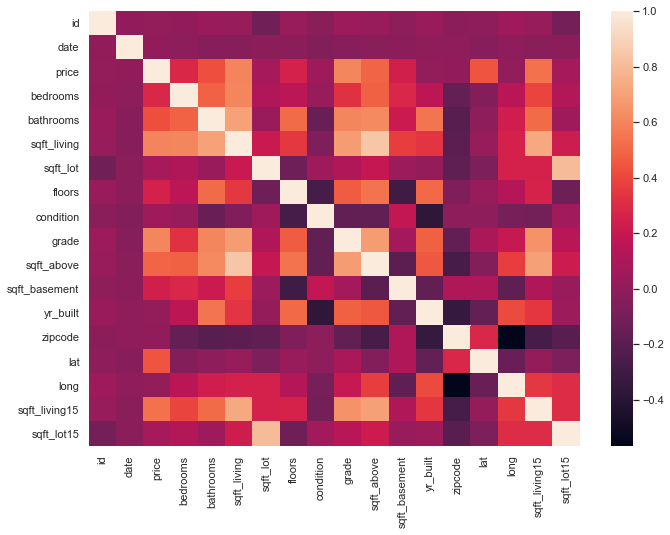

In [127]:
sns.heatmap(df_clean.corr())

In [128]:
price_corrs_clean = df_clean.corr()["price"].map(abs).sort_values(ascending=False)
price_corrs_clean

price            1.000000
grade            0.606736
sqft_living      0.597328
sqft_living15    0.529477
sqft_above       0.486762
lat              0.440351
bathrooms        0.423156
bedrooms         0.285597
floors           0.259499
sqft_basement    0.247124
sqft_lot         0.077649
sqft_lot15       0.076738
condition        0.057303
id               0.014282
long             0.013771
yr_built         0.011254
zipcode          0.007821
date             0.003869
Name: price, dtype: float64

Correlation values still the same.

###### The highest correlation was "sqft_living" (sqft footage of living space of home) to "price"; and "grade" (quality of the house) to "price". 

#### Final_Location__price_map

Also, let's look at the distribution of prices based on location, now that we've cleaned all our features.

[Text(0.5, 0, 'Longitude'),
 Text(0, 0.5, 'Latitude'),
 Text(0.5, 1.0, 'Price by Location')]

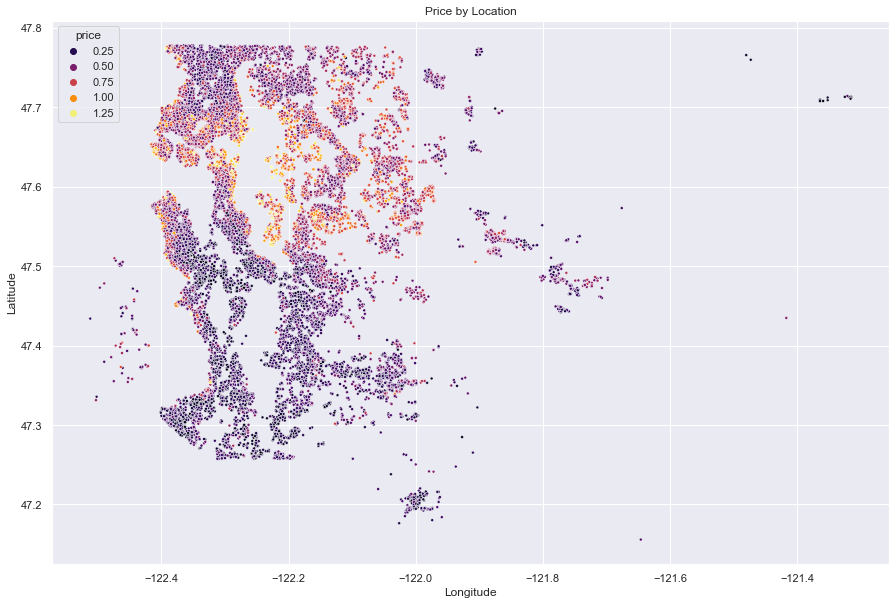

In [129]:
fig = plt.figure(figsize=(15,10))
ax = sns.scatterplot(x=df_new_4["long"], y=df_new_4["lat"], hue=df_new_4["price"], palette="inferno",
                     marker=".")
ax.set( xlabel="Longitude",
        ylabel="Latitude", 
        title="Price by Location")

So this scatter plot reflects the results of our heatmap for correlation to "price". Latitude is more relevant to price as higher priced homes are above 47.55° N. There is strict contrast of home prices above and below 47.55° N. Though as shown in the heatmap for correlation, there is a very weak correlation between longitude and price.

###### Our top contending features to use: 

* grade             0.606736
* sqft_living       0.597328
* sqft_living15     0.529477
* sqft_above        0.486762
* lat               0.440351
* bathrooms         0.423156
* bedrooms          0.285597
* view              0.267184
* floors            0.259499
* sqft_basement     0.247124

Those features above 0.20 correlation value are somewhat of interest. Those above 0.40 are of great interest as features for our model.

## Model Building

#### Model_0

First one is going by all the features and seeing how the model predicts the "price".

In [130]:
X_0 = df_clean.drop("price", 1)
Y_0 =df_clean["price"]

X_0train, X_0test, Y_0train, Y_0test = train_test_split(X_0, Y_0, test_size=0.2, random_state=11)

Trained with 80% of the data and now we will test with the other 20%. 

In [131]:
preds_0 = sm.add_constant(X_0train)
model_0 = sm.OLS(Y_0train , preds_0).fit()
display(model_0.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     1996.
Date:                Tue, 11 May 2021   Prob (F-statistic):               0.00
Time:                        15:08:36   Log-Likelihood:            -2.0524e+05
No. Observations:               15613   AIC:                         4.105e+05
Df Residuals:                   15596   BIC:                         4.107e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -5.55e+07      5e+06    -11.106      0.000   -6.53e+07   -4.57e+07
id            -1.079e-07   3.49e-07     -0.309      0.757   -7.91e-07    5.76e-07
date              2.2583      0.225     10.052      0.000       1.818       2.699
bedrooms      -1.508e+04   1523.682     -9.897      0.000   -1.81e+04   -1.21e+04
bathrooms      2.402e+04   2493.804      9.631      0.000    1.91e+04    2.89e+04
sqft_living      60.9734      1.948     31.293      0.000      57.154      64.793
sqft_lot          0.6236      0.170      3.679      0.000       0.291       0.956
floors         3.506e+04   2747.058     12.761      0.000    2.97e+04    4.04e+04
condition      2.725e+04   1709.161     15.943      0.000    2.39e+04    3.06e+04
grade          8.246e+04   1661.886     49.620      0.000    7.92e+04    8.57e+04
sqft_above       23.0442      1.865     12.354      0.000      19.388      26.700
sqft_basement    37.9286      2.157     17.586      0.000      33.701      42.156
yr_built      -2167.8735     50.568    -42.870      0.000   -2266.993   -2068.754
zipcode        -198.6680     23.715     -8.377      0.000    -245.151    -152.185
lat            5.361e+05   7685.599     69.748      0.000    5.21e+05    5.51e+05
long          -6.314e+04   9903.217     -6.376      0.000   -8.26e+04   -4.37e+04
sqft_living15    60.4691      2.827     21.389      0.000      54.928      66.010
sqft_lot15       -2.0004      0.244     -8.209      0.000      -2.478      -1.523
==============================================================================
Omnibus:                     2505.077   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6392.943
Skew:                           0.893   Prob(JB):                         0.00
Kurtosis:                       5.576   Cond. No.                     3.95e+22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.03e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

* R-squared is 0.672, (coefficient of determination) which is decent but not as high. so 67.2% of the variation can 
  be explained by the features regarding "price"
  
* Prob(F-Statistic) = 0.00, meaning the regressions overall are meaningful

* However, there is a very large condition number, problems with multicollinearity. Condition number generally 
  predicts the independence of each of the predictors, corresponding to lower numbers.

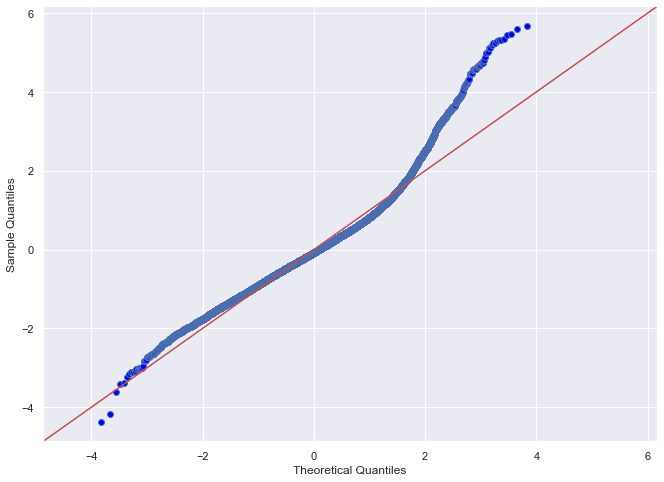

In [132]:
fig = sm.graphics.qqplot(model_0.resid, dist=stats.norm, line="45", fit=True)

Visually the upper end of the lower end of the model isn't really fitting to the data as well.

* So, the question is multicollinearity one of the issues holding back our model from better fitting?

* And what will help clear the problem of multicollinearity?

#### VIF

Let's try using vif (variance inflation factor) values of the features to help us make this model better fitted to the data.

In [133]:
import pandas as pd
import numpy as np
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [134]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_clean.values, i) for i in range(df_clean.shape[1])]
vif["features"] = df_clean.columns

C:\Users\bigbenx3\anaconda3\envs\learn-env\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [135]:
vif

,VIF Factor,features
0,3.720636,id
1,0.179641,date
2,3.017688,price
3,1.708348,bedrooms
4,2.954074,bathrooms
5,inf,sqft_living
6,2.933321,sqft_lot
7,2.196490,floors
8,1.229975,condition
9,3.096882,grade


The objective was to remove those variables with vif greater than 5, and examine if that has improved the model, reducing multicollinearity. 

However, it seems that all the values displayed are below 5 and three resulted in "inf" (infinity vif value).
It would seem "sqft_living" and "sqft_above" and "sqft_basement" may be redundant variables. 

So, removing "sqft_above" and "sqft_basement" shouldn't take from the stats model.

In [136]:
new_4_vif = pd.DataFrame()
new_4_vif["VIF Factor"] = [variance_inflation_factor(df_new_4.values, i) for i in range(df_new_4.shape[1])]
new_4_vif["features"] = df_new_4.columns

C:\Users\bigbenx3\anaconda3\envs\learn-env\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [137]:
new_4_vif

,VIF Factor,features
0,3.726622,id
1,0.182350,date
2,3.173419,price
3,1.717552,bedrooms
4,3.009166,bathrooms
5,inf,sqft_living
6,2.935212,sqft_lot
7,2.200262,floors
8,1.137639,waterfront
9,1.295063,view


Same conclusion, remove "sqft_above" and "sqft_basement" from the stats model.

#### Model_1

In [138]:
for_df_model_1 = df_clean.copy()

In [139]:
df_model_1 = for_df_model_1.drop(["sqft_basement", "sqft_above"], axis= 1)
df_model_1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900.0,3,1.00,1180,5650,1.0,3,7,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000.0,3,2.25,2570,7242,2.0,3,7,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000.0,2,1.00,770,10000,1.0,3,6,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000.0,4,3.00,1960,5000,1.0,5,7,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000.0,3,2.00,1680,8080,1.0,3,8,1987,98074,47.6168,-122.045,1800,7503


In [140]:
X1 = df_model_1.drop("price", 1)
Y1 =df_model_1["price"]

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=11)

In [141]:
preds_1 = sm.add_constant(X1_train)
model_1 = sm.OLS(Y1_train , preds_1).fit()
display(model_1.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     2125.
Date:                Tue, 11 May 2021   Prob (F-statistic):               0.00
Time:                        15:08:37   Log-Likelihood:            -2.0525e+05
No. Observations:               15613   AIC:                         4.105e+05
Df Residuals:                   15597   BIC:                         4.107e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.698e+07   4.99e+06    -11.424      0.000   -6.68e+07   -4.72e+07
id            -9.898e-08   3.49e-07     -0.284      0.777   -7.83e-07    5.85e-07
date              2.2582      0.225     10.046      0.000       1.818       2.699
bedrooms      -1.514e+04   1524.436     -9.931      0.000   -1.81e+04   -1.22e+04
bathrooms       2.62e+04   2440.730     10.735      0.000    2.14e+04     3.1e+04
sqft_living      89.3602      2.881     31.012      0.000      83.712      95.008
sqft_lot          0.6160      0.170      3.632      0.000       0.284       0.948
floors         2.952e+04   2413.816     12.228      0.000    2.48e+04    3.42e+04
condition      2.777e+04   1705.606     16.281      0.000    2.44e+04    3.11e+04
grade          8.178e+04   1654.825     49.418      0.000    7.85e+04     8.5e+04
yr_built      -2173.8023     50.576    -42.981      0.000   -2272.937   -2074.668
zipcode        -194.7942     23.710     -8.216      0.000    -241.268    -148.321
lat            5.398e+05   7637.235     70.685      0.000    5.25e+05    5.55e+05
long          -7.083e+04   9739.251     -7.272      0.000   -8.99e+04   -5.17e+04
sqft_living15    58.7091      2.798     20.986      0.000      53.225      64.193
sqft_lot15       -2.0420      0.244     -8.382      0.000      -2.520      -1.565
==============================================================================
Omnibus:                     2508.347   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6375.624
Skew:                           0.896   Prob(JB):                         0.00
Kurtosis:                       5.567   Cond. No.                     2.77e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.77e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

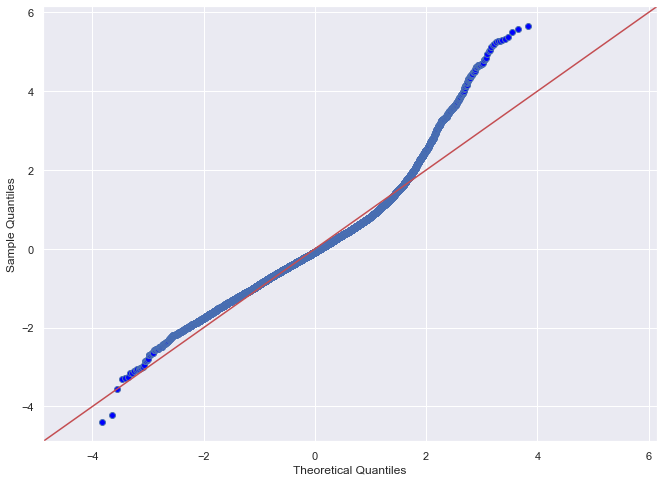

In [142]:
fig = sm.graphics.qqplot(model_1.resid, dist=stats.norm, line="45", fit=True)

* Dropping the redundant features has not taken from the 0.671 R-squared value from before


* It has even reduced the condition number significantly from 3.95e+22 to 2.77e+13


* Prob (F-statistic):	0.00 means the regression is meaningful, significant


* p_values are almost all zero with the exception of "id" 0.77, meaning the results are significant, and to strong 
  evidence to reject the null hypothesis: which says that the results are NOT due to the variables but by chance

#### Model_2

Let's see if dropping the features such as "id" and "date" in addition to the changes made by "df_model_1" and then SCALING the data (so that the coefficients of the variables can be on the "same plane", if you will) will help increase our R-squared value and reduce the condition number.

In [143]:
df_model_2 = df_model_1.copy()

In [144]:
df_model_2 = df_model_2.drop(columns=["id", "date"])
df_model_2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,3,7,1955,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,3,7,1951,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,3,6,1933,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,5,7,1965,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,3,8,1987,98074,47.6168,-122.045,1800,7503


In [145]:
X2 = df_model_2.drop("price", axis=1)
Y2 = df_model_2["price"]

X2_scaled = (X2 - np.mean(X2))/ np.std(X2)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.2, random_state=11)

In [146]:
preds_2 = sm.add_constant(X2_scaled)
model_2 = sm.OLS(Y2, preds_2).fit()
display(model_2.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     3030.
Date:                Tue, 11 May 2021   Prob (F-statistic):               0.00
Time:                        15:08:37   Log-Likelihood:            -2.5667e+05
No. Observations:               19517   AIC:                         5.134e+05
Df Residuals:                   19503   BIC:                         5.135e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           4.76e+05    891.684    533.852      0.000    4.74e+05    4.78e+05
bedrooms      -1.275e+04   1161.545    -10.977      0.000    -1.5e+04   -1.05e+04
bathrooms      1.919e+04   1494.048     12.847      0.000    1.63e+04    2.21e+04
sqft_living    6.232e+04   1824.199     34.165      0.000    5.87e+04    6.59e+04
sqft_lot       5608.4684   1524.651      3.679      0.000    2620.022    8596.915
floors         1.541e+04   1158.257     13.301      0.000    1.31e+04    1.77e+04
condition      1.769e+04    983.642     17.980      0.000    1.58e+04    1.96e+04
grade          7.982e+04   1448.733     55.098      0.000     7.7e+04    8.27e+04
yr_built      -6.446e+04   1339.948    -48.104      0.000   -6.71e+04   -6.18e+04
zipcode       -1.024e+04   1146.508     -8.935      0.000   -1.25e+04   -7996.366
lat            7.531e+04    958.527     78.573      0.000    7.34e+04    7.72e+04
long          -9575.0503   1187.311     -8.064      0.000   -1.19e+04   -7247.819
sqft_living15  3.397e+04   1436.138     23.656      0.000    3.12e+04    3.68e+04
sqft_lot15    -1.379e+04   1570.044     -8.781      0.000   -1.69e+04   -1.07e+04
==============================================================================
Omnibus:                     3176.834   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8048.024
Skew:                           0.908   Prob(JB):                         0.00
Kurtosis:                       5.569   Cond. No.                         5.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The condition number seems quite possibly a scaling issue, or better is to say, scaling was the solution to reducing condition number. However, R-squared value is decreased to 0.669.

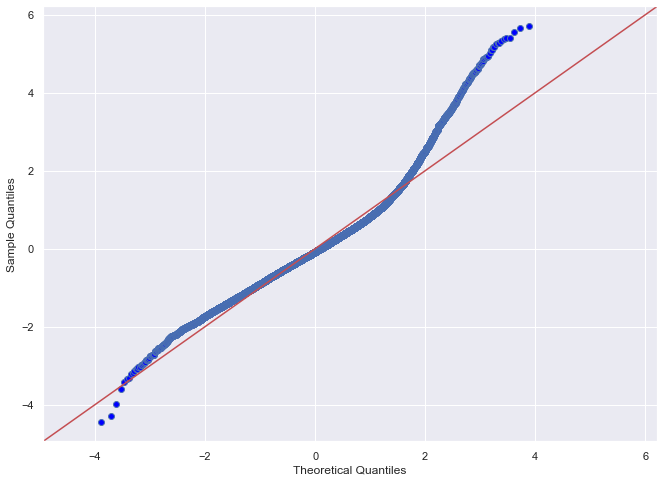

In [147]:
fig = sm.graphics.qqplot(model_2.resid, dist=stats.norm, line="45", fit=True)

* Visually, the fit still seems about the same but with condition number significantly reduced to about 5.09 with is 
  not much higher than 1, reflects that the model is pretty accurate.


* With a lower than optimal R-squared value at 0.669 means that however accurate the model can only account for 66.9% of the variance surrounding "price".

#### Model_3

Did we take out too much data? So we will eliminate only the "id" and date" columns and SCALE the model to avoid a large condition number, but we will make two models: this one will have the data since removal of our supposed outliers, except from "view" and "waterfront". 

Then, another model with every the same, except that the outliers have not been removed.

In [148]:
df_model_3 = df_new_4.copy()

In [149]:
df_model_3 = df_model_3.drop(columns=["id", "date"])
df_model_3.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [150]:
X3 = df_model_3.drop("price", axis=1)
Y3 = df_model_3["price"]

X3_scaled = (X3 - np.mean(X3))/ np.std(X3)
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size=0.2, random_state=11)

In [151]:
preds_3 = sm.add_constant(X3_scaled)
model_3 = sm.OLS(Y3, preds_3).fit()
display(model_3.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     2491.
Date:                Tue, 11 May 2021   Prob (F-statistic):               0.00
Time:                        15:08:38   Log-Likelihood:            -2.5619e+05
No. Observations:               19517   AIC:                         5.124e+05
Df Residuals:                   19499   BIC:                         5.126e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           4.76e+05    870.129    547.076      0.000    4.74e+05    4.78e+05
bedrooms      -9624.2170   1138.039     -8.457      0.000   -1.19e+04   -7393.563
bathrooms       1.53e+04   1505.508     10.162      0.000    1.23e+04    1.83e+04
sqft_living     3.29e+04    980.482     33.560      0.000     3.1e+04    3.48e+04
sqft_lot       4914.9973   1488.462      3.302      0.001    1997.484    7832.510
floors         1.607e+04   1286.814     12.487      0.000    1.35e+04    1.86e+04
waterfront     9560.6438    925.396     10.331      0.000    7746.787    1.14e+04
view           2.287e+04    977.260     23.404      0.000     2.1e+04    2.48e+04
condition      1.836e+04    976.966     18.792      0.000    1.64e+04    2.03e+04
grade          7.808e+04   1425.960     54.753      0.000    7.53e+04    8.09e+04
sqft_above     2.561e+04    990.946     25.841      0.000    2.37e+04    2.75e+04
sqft_basement   1.57e+04    958.692     16.376      0.000    1.38e+04    1.76e+04
yr_built      -5.771e+04   1383.328    -41.715      0.000   -6.04e+04    -5.5e+04
yr_renovated   6667.3087    930.129      7.168      0.000    4844.176    8490.442
zipcode       -1.378e+04   1126.415    -12.236      0.000    -1.6e+04   -1.16e+04
lat            7.811e+04    947.820     82.412      0.000    7.63e+04       8e+04
long          -6924.1155   1181.535     -5.860      0.000   -9240.025   -4608.207
sqft_living15  2.929e+04   1441.248     20.320      0.000    2.65e+04    3.21e+04
sqft_lot15    -1.487e+04   1537.119     -9.671      0.000   -1.79e+04   -1.19e+04
==============================================================================
Omnibus:                     2867.708   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7319.366
Skew:                           0.825   Prob(JB):                         0.00
Kurtosis:                       5.505   Cond. No.                     9.41e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.12e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Extremely high condition number. Cond. No.	9.41e+15 Not much of an R-squared increase.

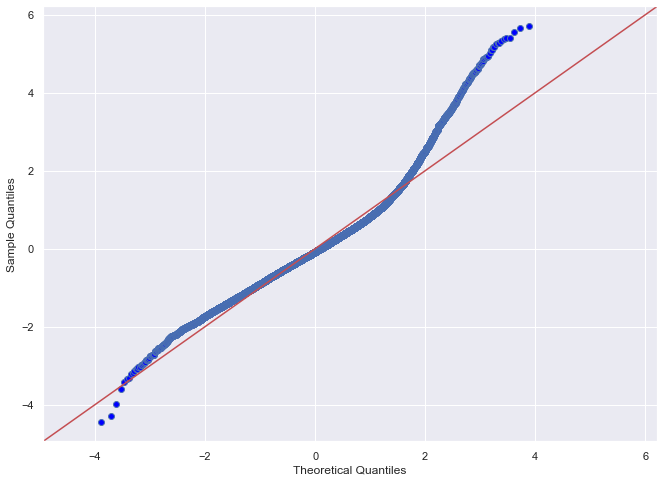

In [152]:
fig = sm.graphics.qqplot(model_2.resid, dist=stats.norm, line="45", fit=True)

Curve is not much better fitted to the line.

#### Model_4

This will be largely unprocessed data. Similar to model_3 but with the outliers included.

In [153]:
df_model_4 = df1.copy()

In [154]:
df_model_4 = df_model_4.drop(columns=["id", "date"])
df_model_4.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [155]:
X4 = df_model_4.drop("price", axis=1)
Y4 = df_model_4["price"]

X4_scaled = (X4 - np.mean(X4))/ np.std(X4)
X4_train, X4_test, Y4_train, Y4_test = train_test_split(X4, Y4, test_size=0.2, random_state=11)

In [156]:
preds_4 = sm.add_constant(X4_scaled)
model_4 = sm.OLS(Y4, preds_4).fit()
display(model_4.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2960.
Date:                Tue, 11 May 2021   Prob (F-statistic):               0.00
Time:                        15:08:38   Log-Likelihood:            -2.9460e+05
No. Observations:               21613   AIC:                         5.892e+05
Df Residuals:                   21595   BIC:                         5.894e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.401e+05   1368.905    394.540      0.000    5.37e+05    5.43e+05
bedrooms      -3.326e+04   1759.490    -18.906      0.000   -3.67e+04   -2.98e+04
bathrooms      3.169e+04   2505.805     12.645      0.000    2.68e+04    3.66e+04
sqft_living    8.181e+04   1588.340     51.508      0.000    7.87e+04    8.49e+04
sqft_lot       5326.4663   1984.923      2.683      0.007    1435.870    9217.062
floors         3612.1992   1941.679      1.860      0.063    -193.635    7418.034
waterfront     5.043e+04   1501.912     33.580      0.000    4.75e+04    5.34e+04
view           4.051e+04   1639.923     24.705      0.000    3.73e+04    4.37e+04
condition      1.717e+04   1530.162     11.221      0.000    1.42e+04    2.02e+04
grade          1.127e+05   2530.456     44.542      0.000    1.08e+05    1.18e+05
sqft_above     7.631e+04   1696.376     44.981      0.000     7.3e+04    7.96e+04
sqft_basement  2.701e+04   1559.700     17.315      0.000    2.39e+04    3.01e+04
yr_built      -7.696e+04   2134.197    -36.062      0.000   -8.11e+04   -7.28e+04
yr_renovated   7958.1195   1468.341      5.420      0.000    5080.062    1.08e+04
zipcode       -3.116e+04   1764.866    -17.657      0.000   -3.46e+04   -2.77e+04
lat            8.352e+04   1487.409     56.149      0.000    8.06e+04    8.64e+04
long          -3.024e+04   1849.583    -16.349      0.000   -3.39e+04   -2.66e+04
sqft_living15  1.486e+04   2362.983      6.289      0.000    1.02e+04    1.95e+04
sqft_lot15    -1.045e+04   2000.508     -5.222      0.000   -1.44e+04   -6526.336
==============================================================================
Omnibus:                    18384.201   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1868224.491
Skew:                           3.566   Prob(JB):                         0.00
Kurtosis:                      47.985   Cond. No.                     5.16e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.24e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Again, extremely high condition number. Cond. No.	9.41e+15 Not much of an R-squared increase to 0.70.

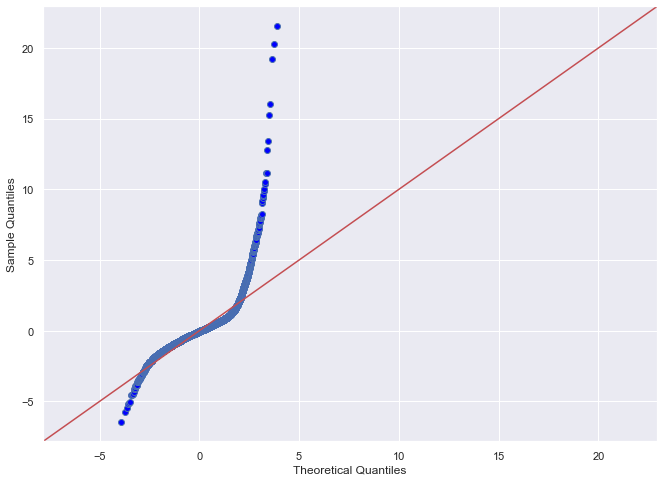

In [157]:
fig = sm.graphics.qqplot(model_4.resid, dist=stats.norm, line="45", fit=True)

Even with a high R-squared value, the condition number plays a huge role in the model fitting the data.
With a large condition number, the model is largely ill conditioned and will not be a good model for prediction.

#### Model_5

This model will borrow the dataset from model_3 and will drop "sqft_above" and "sqft_basement"

In [158]:
df_model_5 = df_model_3.copy()
df_model_5.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [159]:
df_model_5 = df_model_5.drop(columns=["long", "sqft_above", "sqft_basement"])
df_model_5.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1955,0,98178,47.5112,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,1951,1991,98125,47.7210,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,1933,0,98028,47.7379,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1965,0,98136,47.5208,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1987,0,98074,47.6168,1800,7503


In [160]:
X5 = df_model_5.drop("price", axis=1)
Y5 = df_model_5["price"]

X5_scaled = (X5 - np.mean(X5))/ np.std(X5)
X5_train, X5_test, Y5_train, Y5_test = train_test_split(X5, Y5, test_size=0.2, random_state=11)

In [161]:
preds_5 = sm.add_constant(X5_scaled)
model_5 = sm.OLS(Y5, preds_5).fit()
display(model_5.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     2816.
Date:                Tue, 11 May 2021   Prob (F-statistic):               0.00
Time:                        15:08:38   Log-Likelihood:            -2.5621e+05
No. Observations:               19517   AIC:                         5.125e+05
Df Residuals:                   19501   BIC:                         5.126e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           4.76e+05    870.922    546.578      0.000    4.74e+05    4.78e+05
bedrooms      -9494.0748   1138.861     -8.336      0.000   -1.17e+04   -7261.810
bathrooms      1.584e+04   1474.755     10.740      0.000    1.29e+04    1.87e+04
sqft_living        6e+04   1781.478     33.681      0.000    5.65e+04    6.35e+04
sqft_lot       4790.8404   1489.581      3.216      0.001    1871.135    7710.546
floors         1.552e+04   1134.661     13.682      0.000    1.33e+04    1.77e+04
waterfront     9690.6258    925.710     10.468      0.000    7876.155    1.15e+04
view           2.335e+04    968.372     24.112      0.000    2.15e+04    2.52e+04
condition      1.847e+04    975.413     18.934      0.000    1.66e+04    2.04e+04
grade          7.909e+04   1406.122     56.247      0.000    7.63e+04    8.18e+04
yr_built      -5.971e+04   1345.320    -44.381      0.000   -6.23e+04   -5.71e+04
yr_renovated   6438.9053    930.213      6.922      0.000    4615.609    8262.201
zipcode        -1.08e+04   1016.356    -10.625      0.000   -1.28e+04   -8806.678
lat            7.791e+04    939.746     82.910      0.000    7.61e+04    7.98e+04
sqft_living15  2.789e+04   1408.500     19.805      0.000    2.51e+04    3.07e+04
sqft_lot15     -1.61e+04   1525.044    -10.554      0.000   -1.91e+04   -1.31e+04
==============================================================================
Omnibus:                     2992.476   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7761.471
Skew:                           0.853   Prob(JB):                         0.00
Kurtosis:                       5.576   Cond. No.                         4.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Brought down the condition number to 4.96 but looks like 0.684, 68.4% of the variance surround "price" is our ceiling, until we can nail what is preventing the model from fitting.

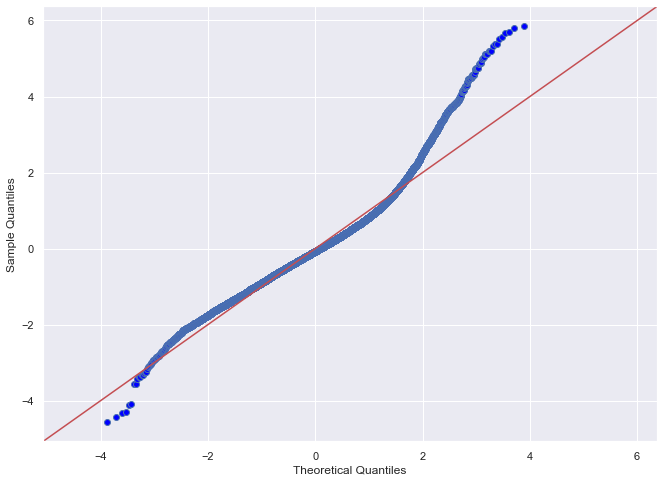

In [162]:
fig = sm.graphics.qqplot(model_5.resid, dist=stats.norm, line="45", fit=True)

## CRITICAL-Model Decision

I think I'll go with model_5 because the scaling brought down the condition number with a comparative R-squared to the other models ; visually it was similar to "model_2" and "model_3".

#### Choosing the Model

In [163]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

lreg = LinearRegression()
ss = StandardScaler()

ss.fit(X5)

X5_st_scaled = ss.transform(X5)

In [164]:
np.allclose(X5_st_scaled, X5_scaled)

True

In [165]:
X5.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1955,0,98178,47.5112,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,1951,1991,98125,47.7210,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,1933,0,98028,47.7379,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1965,0,98136,47.5208,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1987,0,98074,47.6168,1800,7503


In [166]:
X5_st_scaled[:5]

array([[-0.36430818, -1.50725532, -1.05651048, -0.37648062, -0.88023019,
        -0.05645212, -0.26311328, -0.6458709 , -0.51030423, -0.51692778,
        -0.20017957,  1.82180937, -0.34568935, -0.95610283, -0.41505541],
       [-0.36430818,  0.32904114,  0.9114853 , -0.21928019,  0.97841447,
        -0.05645212, -0.26311328, -0.6458709 , -0.51030423, -0.65313607,
         4.98313532,  0.83612924,  1.15537576, -0.34605343, -0.1424572 ],
       [-1.54227417, -1.50725532, -1.63699845,  0.05305573, -0.88023019,
        -0.05645212, -0.26311328, -0.6458709 , -1.53940194, -1.26607335,
        -0.20017957, -0.96785139,  1.27629092,  1.44923479, -0.08448382],
       [ 0.81365781,  1.43081902,  0.04783247, -0.44066421, -0.88023019,
        -0.05645212, -0.26311328,  2.45701214, -0.51030423, -0.17640707,
        -0.20017957,  1.04070436, -0.27700381, -0.92124286, -0.5041398 ],
       [-0.36430818, -0.03821815, -0.34859833, -0.13653273, -0.88023019,
        -0.05645212, -0.26311328, -0.6458709 , 

In [167]:
lreg.fit(X5_st_scaled, Y5)

LinearRegression()

In [168]:
lreg.coef_

array([ -9494.07482959,  15838.7954633 ,  60001.66515229,   4790.84043622,
        15524.71960741,   9690.62579006,  23349.86159908,  18468.92666176,
        79090.48322083, -59706.43572679,   6438.90531562, -10798.8227252 ,
        77914.30173989,  27894.65769385, -16096.06668379])

In [169]:
lreg.intercept_

476027.25972229114

In [170]:
lreg.score(X5_st_scaled, Y5)

0.68413921818657

#### Metrics for Model_5

In [171]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae_5 = mean_absolute_error(Y5, lreg.predict(X5_st_scaled))

In [172]:
mae_5

89839.52184165118

Accuracy of prediction off by +/- 89840 USD

In [173]:
(mae_5)/(df_model_5.price.mean())

0.18872768314583938

18.9% margin

In [174]:
msqu_5 = mean_squared_error(Y5, lreg.predict(X5_st_scaled))
msqu_5

14791616817.428638

In [175]:
rmse_5 = np.sqrt(msqu_5)
rmse_5

121620.79105740367

In [176]:
print("Root Mean Square Error:", rmse_5)
print("Mean Absolute Error:", mae_5)

Root Mean Square Error: 121620.79105740367
Mean Absolute Error: 89839.52184165118


<AxesSubplot:ylabel='Count'>

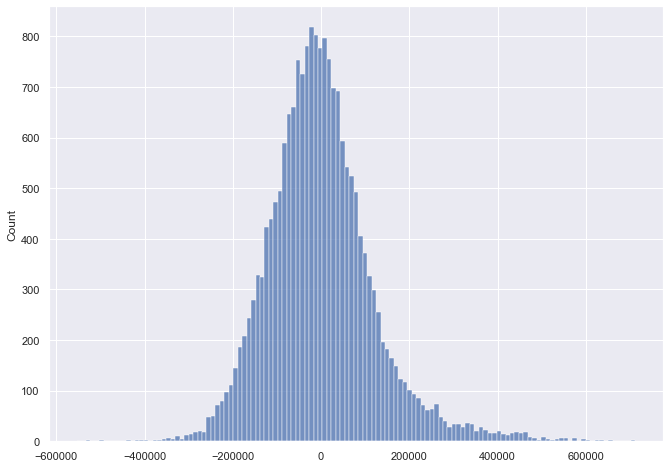

In [177]:
sns.histplot(model_5.resid)

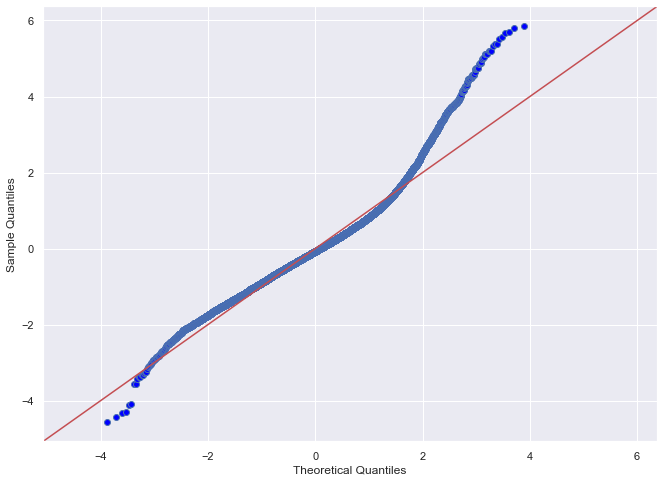

In [178]:
fig = sm.graphics.qqplot(model_5.resid, dist=stats.norm, line='45', fit=True)

## Data Question - Answers

1. The factors most affecting the price of a house are:

* Location(lat)

* Quality of the house(grade)

* Living area(sqft_living)


## Results

* We have a model that has an Coefficient of Determination(R-squared) value of 0.684 which indicates that our model can explain 68.4% of all variation in the data around the mean.


* With a Mean Squared Error of around 89840 USD, that means our predicted price is, on average, 89840 USD off from our mean. While that number doesn't look too bad our Root Mean Squared Error is around 121621 USD which means that our model is being heavily penalized for predictions that are very far off the actual price.


* Average home price: 476,027 USD. The price prediction was +/-$89840 off the real price (18.9% margin of error)


In [179]:
df_new_1["price"].describe()

count    1.965300e+04
mean     4.772380e+05
std      2.184449e+05
min      7.500000e+04
25%      3.125000e+05
50%      4.330000e+05
75%      5.999500e+05
max      1.312000e+06
Name: price, dtype: float64

In [180]:
df_model_5["price"].describe()

count    1.951700e+04
mean     4.760273e+05
std      2.164069e+05
min      8.200000e+04
25%      3.125000e+05
50%      4.325000e+05
75%      5.985000e+05
max      1.312000e+06
Name: price, dtype: float64

## Conclusions

Descriptive analysis and modeling reveal which factors contribute most to housing prices: 

● Increase Living Area(in square feet) 

● Buy homes in regions specified (North of 47.55°N latitude are the more expensive homes) 
    maybe homes outside of this region will likely be more affordable) 
    
● Upgrade the quality of your home:
  This includes a large part curb appeal, fixing up the walkway, shrubbery surrounding the house, outdoor patio - 
  making the house more aesthetic from the outside. Making your house more energy efficient. Fresh coats of paint 
  could do a great deal like in the kitchen can alter the overall feel. (link below)

https://www.bankrate.com/loans/home-improvement/cheap-fixes-to-boost-the-value-of-your-home/

## Future Research

* The data we were provided was from 2014 to 2015. And such outdated data may not give us the optimal insights relevant to 
  today's housing situation

* We should be able to get a lot more out of the location data, with further analysis, incorporating data relevant to the 
  zipcode so there is a better determination for prices that can be expected in a more defined area.

* Also, streamlining the methods of getting a more fitted model without going too far into "overfitted" territory. 
  Like I've mentioned before, there is a happy medium in there.

* The most obvious next step is to try out new modeling techniques.  While linear regression is a good start, there are many 
  other techniques that I believe could help make better predictions.  Of particular interest to me in this context are 
  Polynomial Regression and Weighted Least Squares, that might be promising.

## Presentation Prep

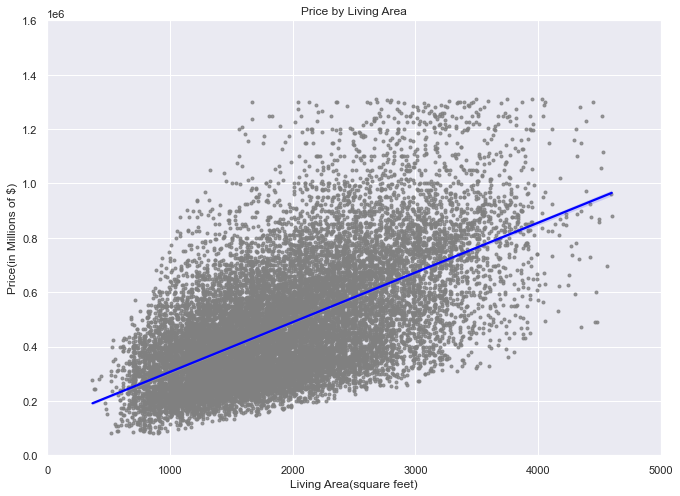

In [181]:
fig = plt.figure(figsize=(11,8))
ax = sns.regplot(data=df_new_4, x="sqft_living", y="price", marker=".",
     scatter_kws={"color": "grey"}, line_kws={"color": "blue"})

ax.set(  xlabel="Living Area(square feet)",
         ylabel="Price(in Millions of $)", 
         title="Price by Living Area",
 )


plt.xlim([0,5000])
plt.ylim([0, 1600000])
plt.show()

In [182]:
df_new_4.grade.describe()

count    19517.000000
mean         7.495875
std          0.971750
min          5.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         10.000000
Name: grade, dtype: float64

[[Text(0, 0, '5'),
  Text(1, 0, '6'),
  Text(2, 0, '7'),
  Text(3, 0, '8'),
  Text(4, 0, '9'),
  Text(5, 0, '10')],
 Text(0.5, 0, 'Grade'),
 Text(0, 0.5, 'Price (in Thousands of $)'),
 Text(0.5, 1.0, 'Price by Grade')]

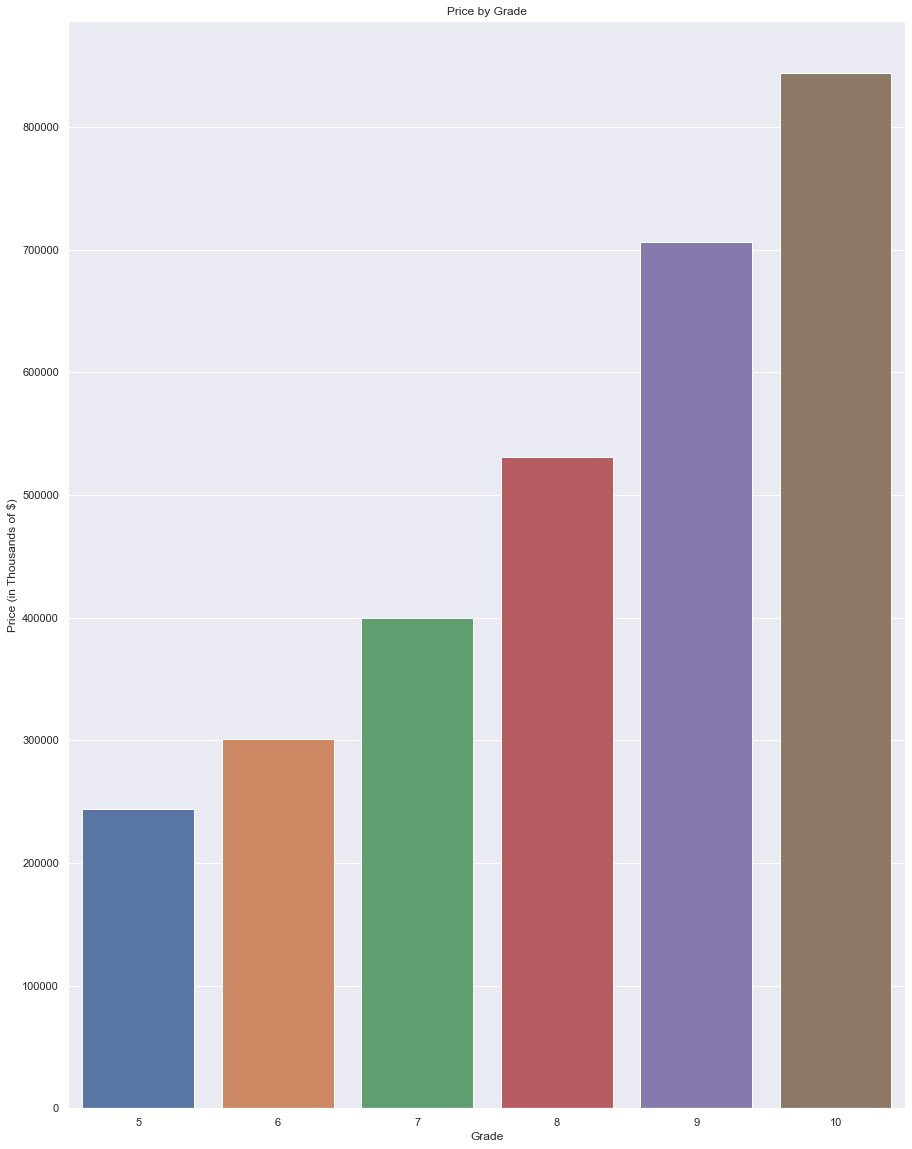

In [183]:
fig = plt.figure(figsize=(15,20))
ax = sns.barplot(data=df_new_4, x="grade", y="price", ci=None)
ax.set( xticklabels=(["5", "6", "7", "8", "9", "10"]),
        xlabel="Grade",
        ylabel="Price (in Thousands of $)", 
        title="Price by Grade"  )